<center>

# <span style="color:red; font-size:70px;"> Modello di Ising 1D</span>

</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

temp = np.array(['0.5','0.6','0.7','0.8','0.9','1.0','1.1','1.2','1.3','1.4','1.5','1.6','1.7','1.8','1.9','2.0'])
t_camp = np.array([0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0])

<center>

# <span style="color:green; font-size:60px;"> h = 0.02</span>

</center>

<center>

<span style="color:blue; font-size:50px;"> Magnetizzazione</span>

</center>

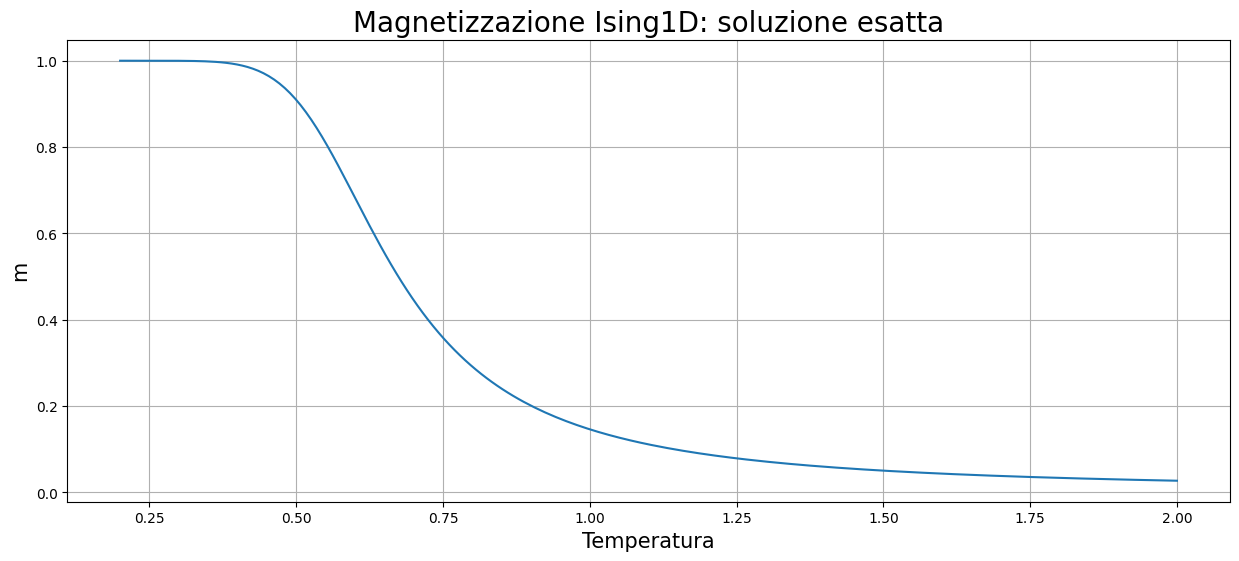

In [2]:
T = np.linspace(0.2, 2.0, 200)
beta = 1/T
h = 0.02
J = 1.0

m = np.sinh(beta * h)/np.sqrt(np.exp(-4*beta*J) + np.sinh(beta * h)**2)


fig = plt.figure(figsize = (15, 6))

plt.plot(T, m, label = 'Valor vero')

plt.title("Magnetizzazione Ising1D: soluzione esatta", fontsize = 20)
plt.xlabel("Temperatura", fontsize = 15)
plt.ylabel("m", fontsize = 15)

plt.grid(True)
plt.show()

<center>

<span style="color:blue; font-size:50px;"> Energia interna</span>

</center>

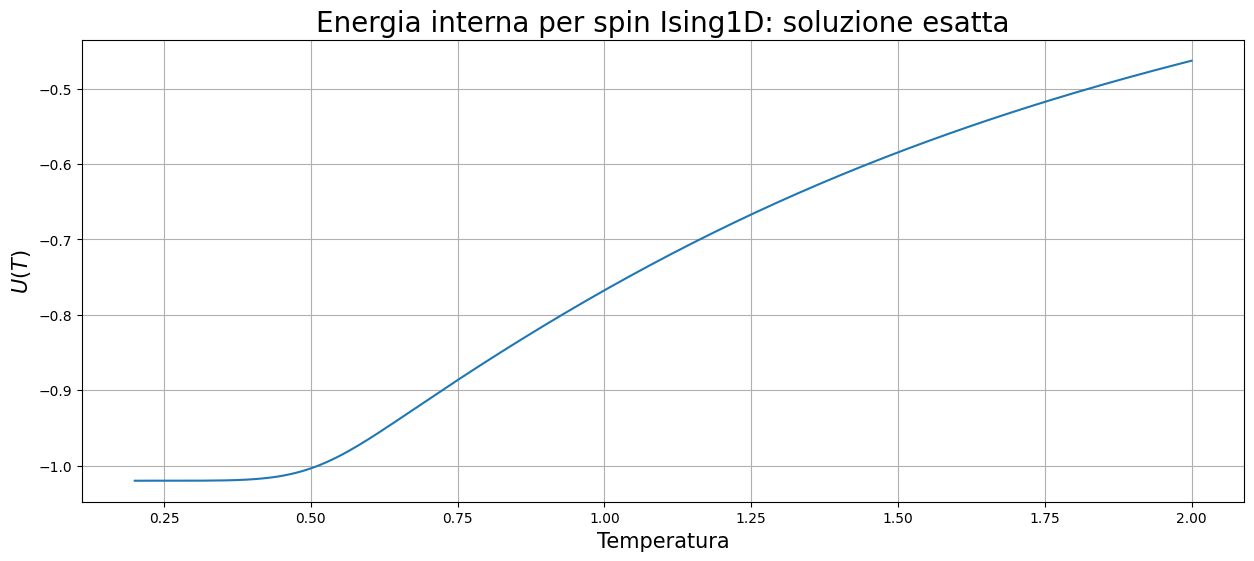

In [3]:
T = np.linspace(0.2, 2.0, 200)
beta = 1/T
h = 0.02
J = 1.0

rad = np.sqrt(np.exp(-2 * beta * J) + np.exp(2 * beta * J) * pow(np.sinh(beta * h), 2))

l1 = np.exp(beta * J) * np.cosh(beta * h) + rad
term1 = np.exp(beta * J) * (J * np.cosh(beta * h) + h * np.sinh(beta * h))
term2 = -2 * J * np.exp(-2 * beta * J) + 2 * J * np.exp(2 * beta * J) * pow(np.sinh(beta * h), 2) + 2 * h * np.exp(2 * beta * J) * np.sinh(beta * h) * np.cosh(beta * h)

ene = - (1/l1) * (term1 + term2/(2 * rad))


fig = plt.figure(figsize = (15, 6))

plt.plot(T, ene)


plt.title("Energia interna per spin Ising1D: soluzione esatta", fontsize = 20)
plt.xlabel("Temperatura", fontsize = 15)
plt.ylabel(r"$U\left(T\right)$", fontsize = 15)

plt.grid(True)
plt.show()

<center>

<span style="color:blue; font-size:50px;"> Suscettività magnetica</span>

</center>

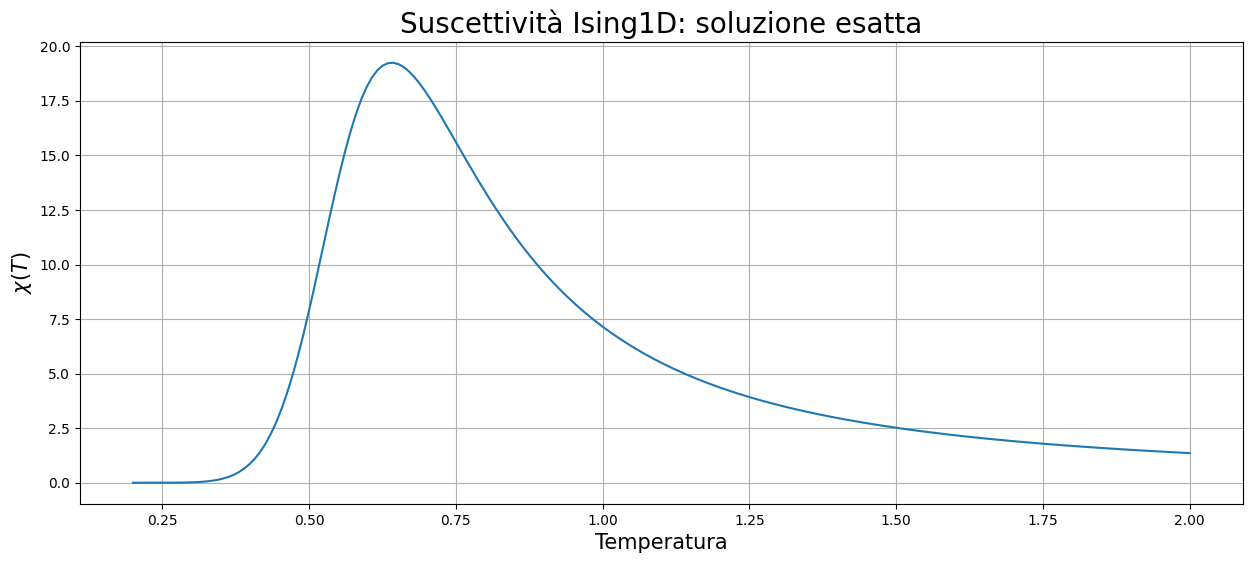

In [4]:
T = np.linspace(0.2, 2.0, 200)
beta = 1/T
h = 0.02
J = 1.0


num = np.cosh(beta * h) * np.exp(-4 * beta * J)
den = pow(np.exp(-4 * beta * J) + pow(np.sinh(beta * h), 2), 1.5)
chi = beta  * num/den


fig = plt.figure(figsize = (15, 6))

plt.plot(T, chi)

plt.title("Suscettività Ising1D: soluzione esatta", fontsize = 20)
plt.xlabel("Temperatura", fontsize = 15)
plt.ylabel(r"$\chi\left(T\right)$", fontsize = 15)

plt.grid(True)
plt.show()

<center>

<span style="color:blue; font-size:50px;"> Calore specifico</span>

</center>


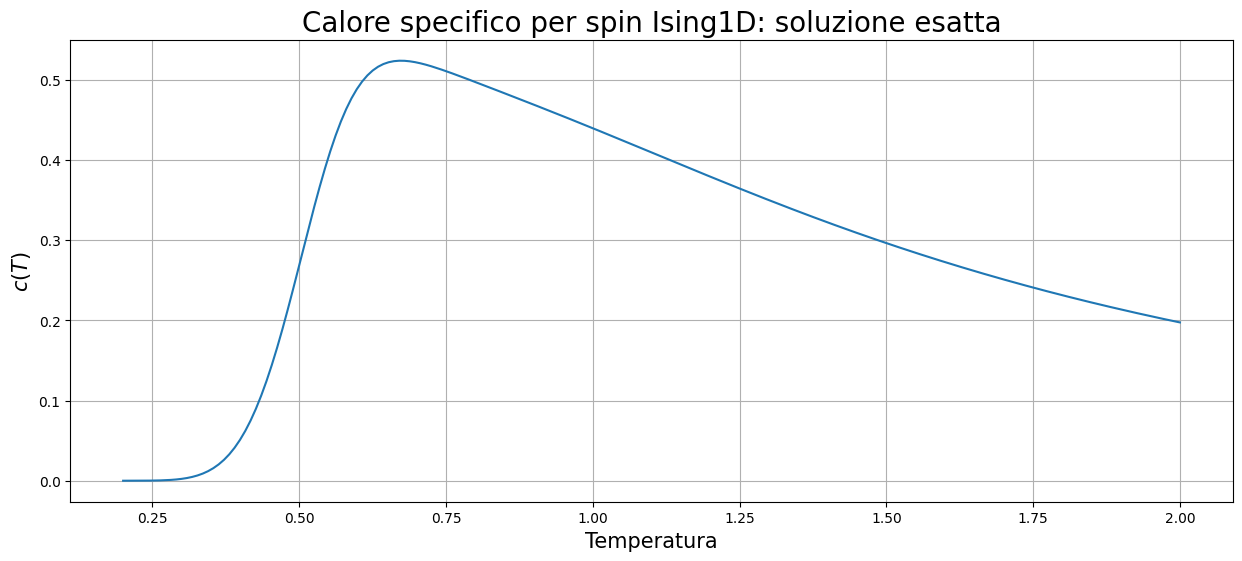

In [5]:
T = np.linspace(0.2, 2.0, 200)
beta = 1/T
h = 0.02
J = 1.0

beta_h = beta * h
beta_J = beta * J

rad = np.sqrt(np.exp(-2 * beta_J) + np.exp(2 * beta_J) * pow(np.sinh(beta_h), 2))

l1 = np.exp(beta_J) * np.cosh(beta_h) + rad

# Derivate prime
der1_t1 = np.exp(beta_J) * (J * np.cosh(beta_h) + h * np.sinh(beta_h))
der_arg_rad = -2 * J * np.exp(-2 * beta_J) + 2 * np.exp(2 * beta_J) * np.sinh(beta_h) * (J * np.sinh(beta_h) + h * np.cosh(beta_h))
der1_t2 = (1/(2 * rad)) * der_arg_rad
der1 = der1_t1 + der1_t2


# Derivate seconde
der2_t1 = np.exp(beta_J) * (np.cosh(beta_h) * (J**2 + h**2) + 2 * h * J * np.sinh(beta_h))
der2_arg_rad_t1 = 4 * J**2 * np.exp(-2 * beta_J)
der2_arg_rad_t2 = 2 * J * np.exp(2 * beta_J) * (2 * J * pow(np.sinh(beta * h), 2) + h * np.sinh(2 * beta_h))
der2_arg_rad_t3 = np.exp(2 * beta_J) * (2 * J * h * np.sinh(2 * beta * h) + 2 * h**2 * np.cosh(2 * beta_h))
der2_arg_rad = der2_arg_rad_t1 + der2_arg_rad_t2 + der2_arg_rad_t3
der2_t2 = - (1/(4 * pow(rad, 3))) * pow(der_arg_rad, 2) + (1/(2 * rad)) * der2_arg_rad
der2 = der2_t1 + der2_t2


cv = pow(beta, 2)/l1 * (-1/l1 * der1**2 + der2)


fig = plt.figure(figsize = (15, 6))

plt.plot(T, cv)

plt.title("Calore specifico per spin Ising1D: soluzione esatta", fontsize = 20)
plt.xlabel("Temperatura", fontsize = 15)
plt.ylabel(r"$c\left(T\right)$", fontsize = 15)

plt.grid(True)
plt.show()

<center>

# Confronto con risultati simulativi

</center>

In [6]:
beta_camp = 1/t_camp
h = 0.02
J = 1.0


# Magnetizzazione per confronto
m_camp = np.sinh(beta_camp * h)/np.sqrt(np.exp(-4*beta_camp*J) + np.sinh(beta_camp * h)**2)


# Suscettività per confronto
num = np.cosh(beta_camp * h) * np.exp(-4 * beta_camp * J)
den = pow(np.exp(-4 * beta_camp * J) + pow(np.sinh(beta_camp * h), 2), 1.5)
chi_camp = beta_camp  * num/den


# Energia per confronto 
rad = np.sqrt(np.exp(-2 * beta_camp * J) + np.exp(2 * beta_camp * J) * pow(np.sinh(beta_camp * h), 2))

l1 = np.exp(beta_camp * J) * np.cosh(beta_camp * h) + rad
term1 = np.exp(beta_camp * J) * (J * np.cosh(beta_camp * h) + h * np.sinh(beta_camp * h))
term2 = -2 * J * np.exp(-2 * beta_camp * J) + 2 * J * np.exp(2 * beta_camp * J) * pow(np.sinh(beta_camp * h), 2) + 2 * h * np.exp(2 * beta_camp * J) * np.sinh(beta_camp * h) * np.cosh(beta_camp * h)

ene_camp = - (1/l1) * (term1 + term2/(2 * rad))


# Calore specifico per confronto
beta_h = beta_camp * h
beta_J = beta_camp * J

rad = np.sqrt(np.exp(-2 * beta_J) + np.exp(2 * beta_J) * pow(np.sinh(beta_h), 2))
l1 = np.exp(beta_J) * np.cosh(beta_h) + rad

# Derivate prime
der1_t1 = np.exp(beta_J) * (J * np.cosh(beta_h) + h * np.sinh(beta_h))
der_arg_rad = -2 * J * np.exp(-2 * beta_J) + 2 * np.exp(2 * beta_J) * np.sinh(beta_h) * (J * np.sinh(beta_h) + h * np.cosh(beta_h))
der1_t2 = (1/(2 * rad)) * der_arg_rad
der1 = der1_t1 + der1_t2

# Derivate seconde
der2_t1 = np.exp(beta_J) * (np.cosh(beta_h) * (J**2 + h**2) + 2 * h * J * np.sinh(beta_h))
der2_arg_rad_t1 = 4 * J**2 * np.exp(-2 * beta_J)
der2_arg_rad_t2 = 2 * J * np.exp(2 * beta_J) * (2 * J * pow(np.sinh(beta_h), 2) + h * np.sinh(2 * beta_h))
der2_arg_rad_t3 = np.exp(2 * beta_J) * (2 * J * h * np.sinh(2 * beta_h) + 2 * h**2 * np.cosh(2 * beta_h))
der2_arg_rad = der2_arg_rad_t1 + der2_arg_rad_t2 + der2_arg_rad_t3
der2_t2 = - (1/(4 * pow(rad, 3))) * pow(der_arg_rad, 2) + (1/(2 * rad)) * der2_arg_rad
der2 = der2_t1 + der2_t2

cv_camp = pow(beta_camp, 2)/l1 * (-1/l1 * der1**2 + der2)


<center>

<span style="color:blue; font-size:50px;"> N = 1000 </span>

</center>


In [7]:
size = '1000'

ene_1000 = np.zeros(len(temp))
ene_1000_err = np.zeros(len(temp))

magn_1000 = np.zeros(len(temp))
magn_1000_err = np.zeros(len(temp))

cp_1000 = np.zeros(len(temp))
cp_1000_err = np.zeros(len(temp))

chi_1000 = np.zeros(len(temp))
chi_1000_err = np.zeros(len(temp))


# Ciclo sulle varie temperature
for i in range(0, len(temp)):

    # Carico gli osservabili da file
    name = 'magn0.02/obs/obs_size' + size + '_t' + temp[i] + '.out'
    obs = np.loadtxt(name)


    # Valuto i valori medi
    ene_1000[i] = np.mean(obs[:, 1])
    ene_1000_err[i] = np.std(obs[:, 1], ddof=1)

    magn_1000[i] = np.mean(obs[:, 2])
    magn_1000_err[i] = np.std(obs[:, 2], ddof=1)
    
    cp_1000[i] = np.mean(obs[:, 3])
    cp_1000_err[i] = np.std(obs[:, 3], ddof=1)
    
    chi_1000[i] = np.mean(obs[:, 4])
    chi_1000_err[i] = np.std(obs[:, 4], ddof=1)

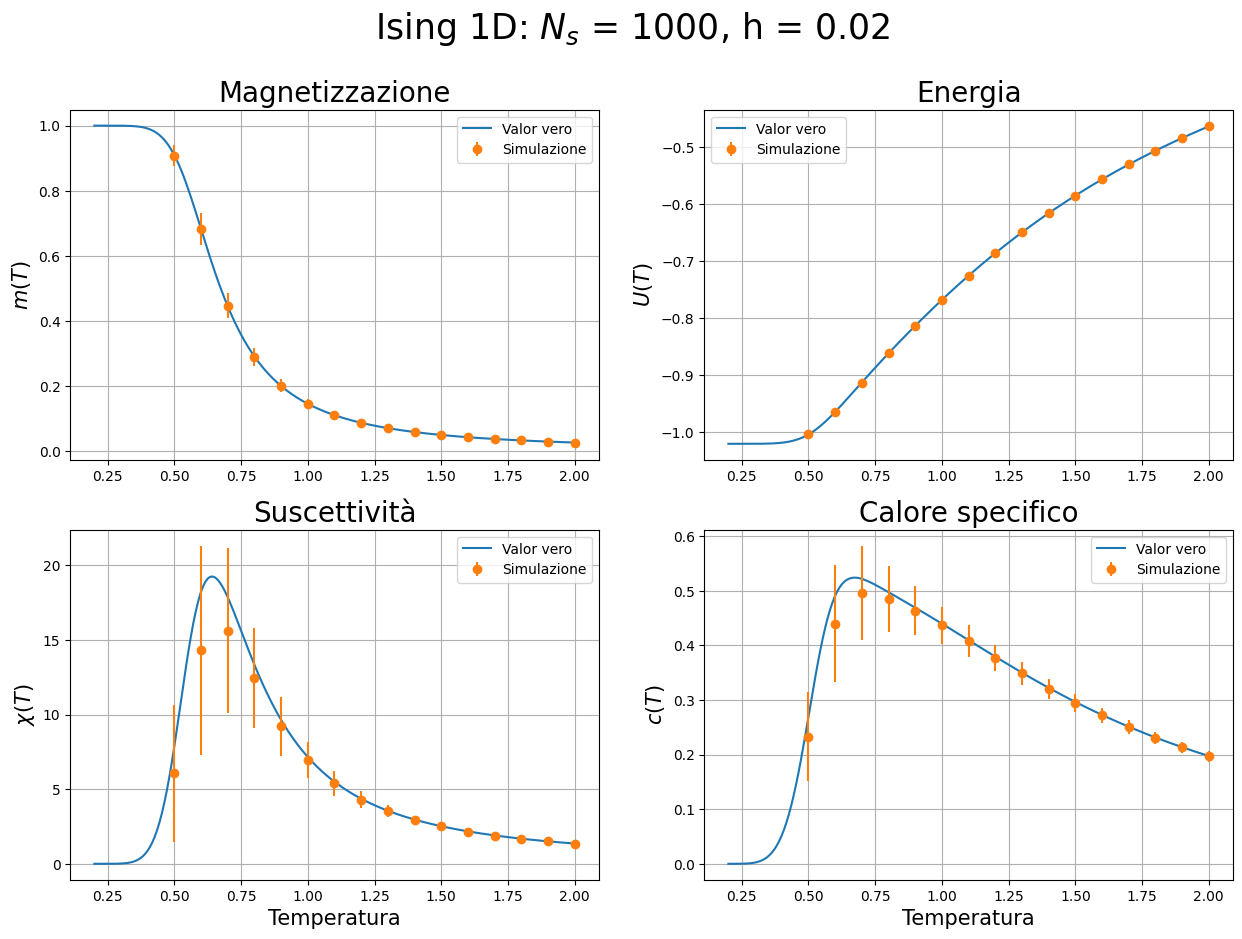

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0, 0].plot(T, m, label = 'Valor vero')
ax[0, 0].errorbar(t_camp, magn_1000, yerr = magn_1000_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[0, 0].set_ylabel(r'$m\left(T\right)$', fontsize = 15)
ax[0, 0].set_title(r'Magnetizzazione', fontsize = 20)
ax[0, 0].legend(loc = 'best')
ax[0, 0].grid(True)

ax[0, 1].plot(T, ene, label = 'Valor vero')
ax[0, 1].errorbar(t_camp, ene_1000, yerr = ene_1000_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[0, 1].set_ylabel(r'$U\left(T\right)$', fontsize = 15)
ax[0, 1].set_title(r'Energia', fontsize = 20)
ax[0, 1].legend(loc = 'best')
ax[0, 1].grid(True)

ax[1, 0].plot(T, chi, label = 'Valor vero')
ax[1, 0].errorbar(t_camp, chi_1000, yerr = chi_1000_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[1, 0].set_xlabel('Temperatura', fontsize = 15)
ax[1, 0].set_ylabel(r'$\chi\left(T\right)$', fontsize = 15)
ax[1, 0].set_title(r'Suscettività', fontsize = 20)
ax[1, 0].legend(loc = 'best')
ax[1, 0].grid(True)

ax[1, 1].plot(T, cv, label = 'Valor vero')
ax[1, 1].errorbar(t_camp, cp_1000, yerr = cp_1000_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[1, 1].set_xlabel('Temperatura', fontsize = 15)
ax[1, 1].set_ylabel(r'$c\left(T\right)$', fontsize = 15)
ax[1, 1].set_title(r'Calore specifico', fontsize = 20)
ax[1, 1].legend(loc = 'best')
ax[1, 1].grid(True)

fig.suptitle(r'Ising 1D: $N_s$ = 1000, h = 0.02', fontsize = 25)
plt.show()

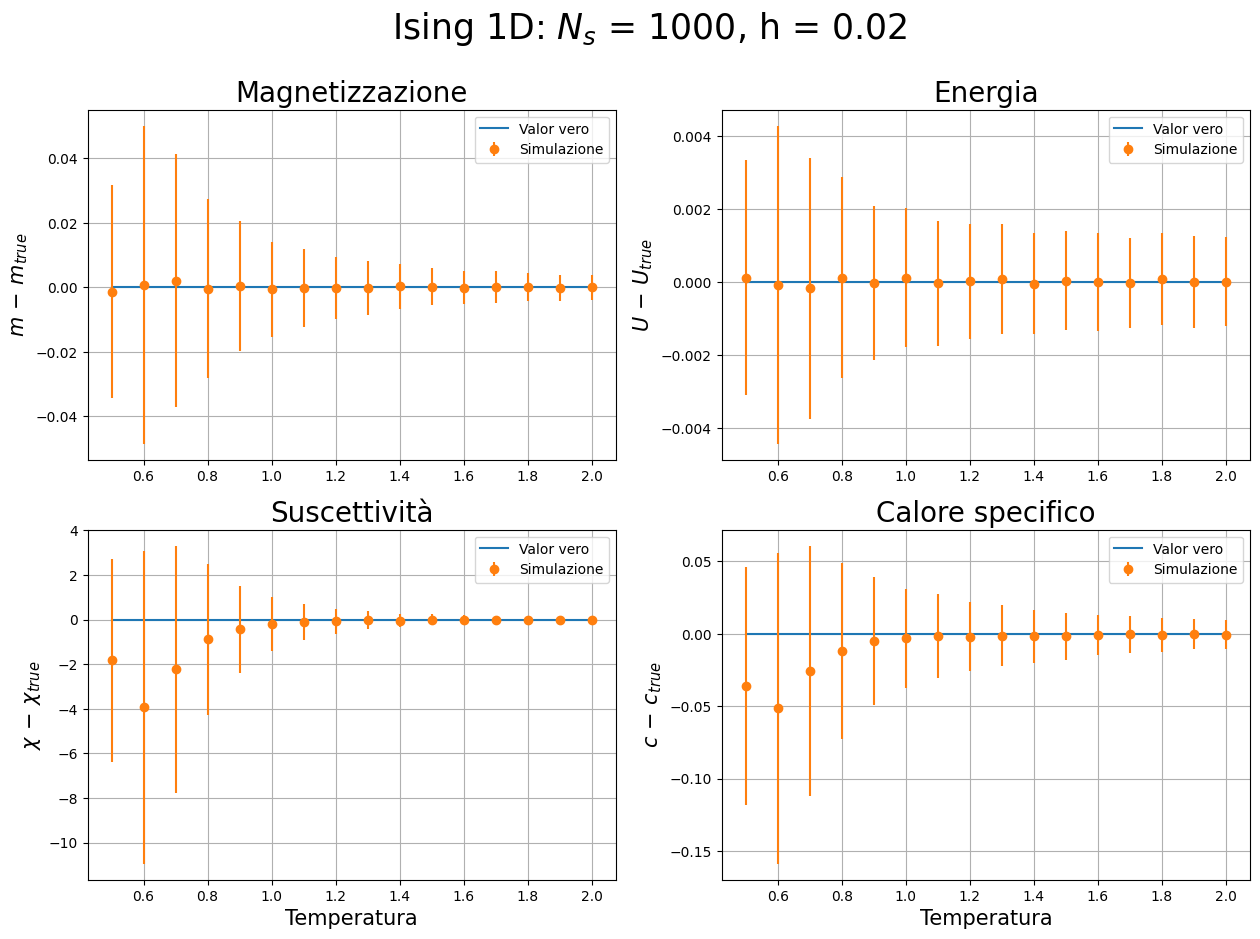

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0, 0].plot(t_camp, np.zeros(len(m_camp)), label = 'Valor vero')
ax[0, 0].errorbar(t_camp, magn_1000 - m_camp, yerr = magn_1000_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[0, 0].set_ylabel(r'$m\,-\,m_{true}$', fontsize = 15)
ax[0, 0].set_title(r'Magnetizzazione', fontsize = 20)
ax[0, 0].legend(loc = 'best')
ax[0, 0].grid(True)

ax[0, 1].plot(t_camp, np.zeros(len(t_camp)), label = 'Valor vero')
ax[0, 1].errorbar(t_camp, ene_1000 - ene_camp, yerr = ene_1000_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[0, 1].set_ylabel(r'$U\,-\,U_{true}$', fontsize = 15)
ax[0, 1].set_title(r'Energia', fontsize = 20)
ax[0, 1].legend(loc = 'best')
ax[0, 1].grid(True)

ax[1, 0].plot(t_camp, np.zeros(len(t_camp)), label = 'Valor vero')
ax[1, 0].errorbar(t_camp, chi_1000 - chi_camp, yerr = chi_1000_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[1, 0].set_xlabel('Temperatura', fontsize = 15)
ax[1, 0].set_ylabel(r'$\chi\,-\,\chi_{true}$', fontsize = 15)
ax[1, 0].set_title(r'Suscettività', fontsize = 20)
ax[1, 0].legend(loc = 'best')
ax[1, 0].grid(True)

ax[1, 1].plot(t_camp, np.zeros(len(t_camp)), label = 'Valor vero')
ax[1, 1].errorbar(t_camp, cp_1000 - cv_camp, yerr = cp_1000_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[1, 1].set_xlabel('Temperatura', fontsize = 15)
ax[1, 1].set_ylabel(r'$c\,-\,c_{true}$', fontsize = 15)
ax[1, 1].set_title(r'Calore specifico', fontsize = 20)
ax[1, 1].legend(loc = 'best')
ax[1, 1].grid(True)

fig.suptitle(r'Ising 1D: $N_s$ = 1000, h = 0.02', fontsize = 25)
plt.show()

<center>

<span style="color:blue; font-size:50px;"> N = 3000 </span>

</center>


In [11]:
size = '3000'

ene_3000 = np.zeros(len(temp))
ene_3000_err = np.zeros(len(temp))

magn_3000 = np.zeros(len(temp))
magn_3000_err = np.zeros(len(temp))

cp_3000 = np.zeros(len(temp))
cp_3000_err = np.zeros(len(temp))

chi_3000 = np.zeros(len(temp))
chi_3000_err = np.zeros(len(temp))


# Ciclo sulle varie temperature
for i in range(0, len(temp)):

    # Carico gli osservabili da file
    name = 'magn0.02/obs/obs_size' + size + '_t' + temp[i] + '.out'
    obs = np.loadtxt(name)


    # Valuto i valori medi
    ene_3000[i] = np.mean(obs[:, 1])
    ene_3000_err[i] = np.std(obs[:, 1], ddof=1)

    magn_3000[i] = np.mean(obs[:, 2])
    magn_3000_err[i] = np.std(obs[:, 2], ddof=1)
    
    cp_3000[i] = np.mean(obs[:, 3])
    cp_3000_err[i] = np.std(obs[:, 3], ddof=1)
    
    chi_3000[i] = np.mean(obs[:, 4])
    chi_3000_err[i] = np.std(obs[:, 4], ddof=1)

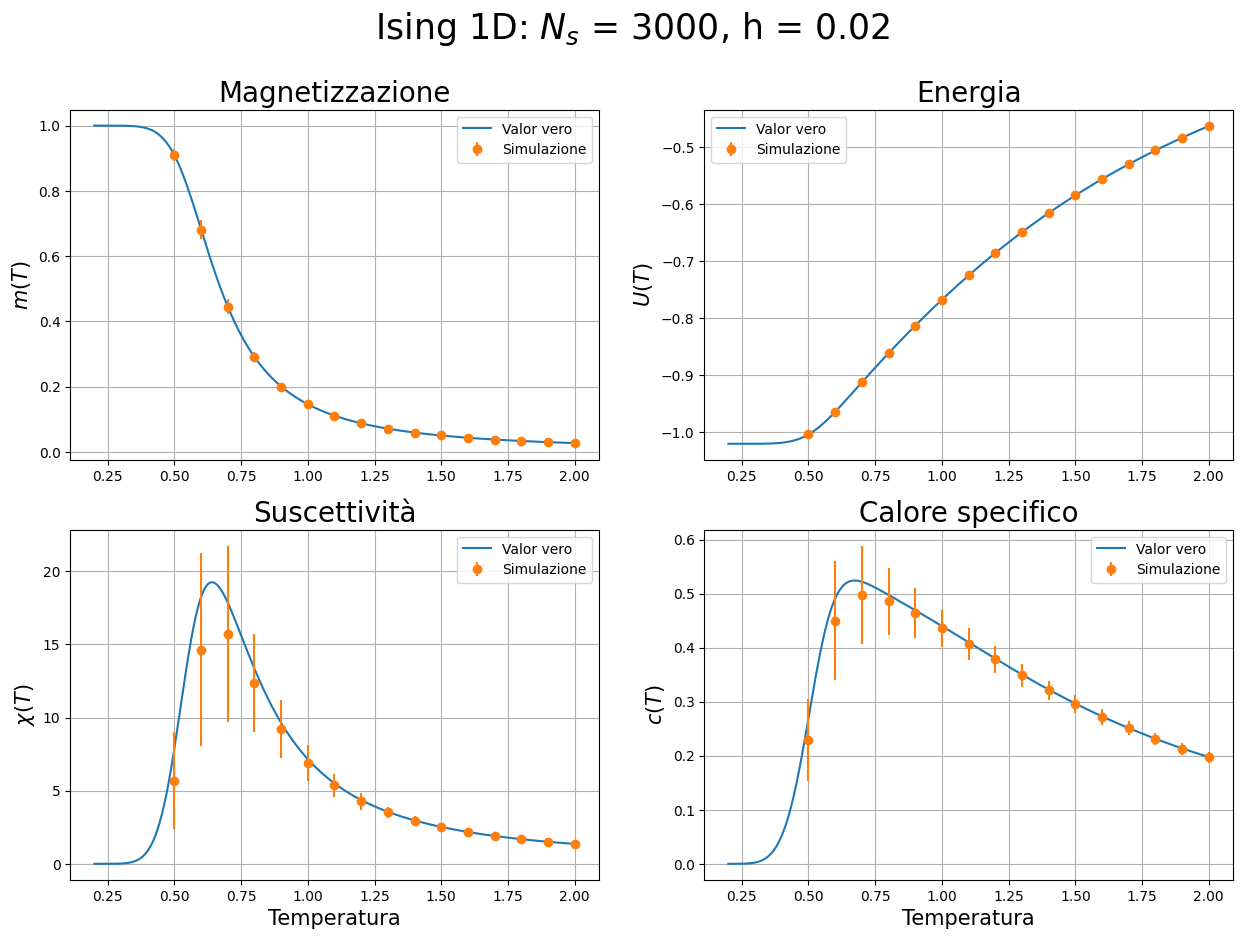

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0, 0].plot(T, m, label = 'Valor vero')
ax[0, 0].errorbar(t_camp, magn_3000, yerr = magn_3000_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[0, 0].set_ylabel(r'$m\left(T\right)$', fontsize = 15)
ax[0, 0].set_title(r'Magnetizzazione', fontsize = 20)
ax[0, 0].legend(loc = 'best')
ax[0, 0].grid(True)

ax[0, 1].plot(T, ene, label = 'Valor vero')
ax[0, 1].errorbar(t_camp, ene_3000, yerr = ene_3000_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[0, 1].set_ylabel(r'$U\left(T\right)$', fontsize = 15)
ax[0, 1].set_title(r'Energia', fontsize = 20)
ax[0, 1].legend(loc = 'best')
ax[0, 1].grid(True)

ax[1, 0].plot(T, chi, label = 'Valor vero')
ax[1, 0].errorbar(t_camp, chi_3000, yerr = chi_3000_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[1, 0].set_xlabel('Temperatura', fontsize = 15)
ax[1, 0].set_ylabel(r'$\chi\left(T\right)$', fontsize = 15)
ax[1, 0].set_title(r'Suscettività', fontsize = 20)
ax[1, 0].legend(loc = 'best')
ax[1, 0].grid(True)

ax[1, 1].plot(T, cv, label = 'Valor vero')
ax[1, 1].errorbar(t_camp, cp_3000, yerr = cp_3000_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[1, 1].set_xlabel('Temperatura', fontsize = 15)
ax[1, 1].set_ylabel(r'$c\left(T\right)$', fontsize = 15)
ax[1, 1].set_title(r'Calore specifico', fontsize = 20)
ax[1, 1].legend(loc = 'best')
ax[1, 1].grid(True)

fig.suptitle(r'Ising 1D: $N_s$ = 3000, h = 0.02', fontsize = 25)
plt.show()

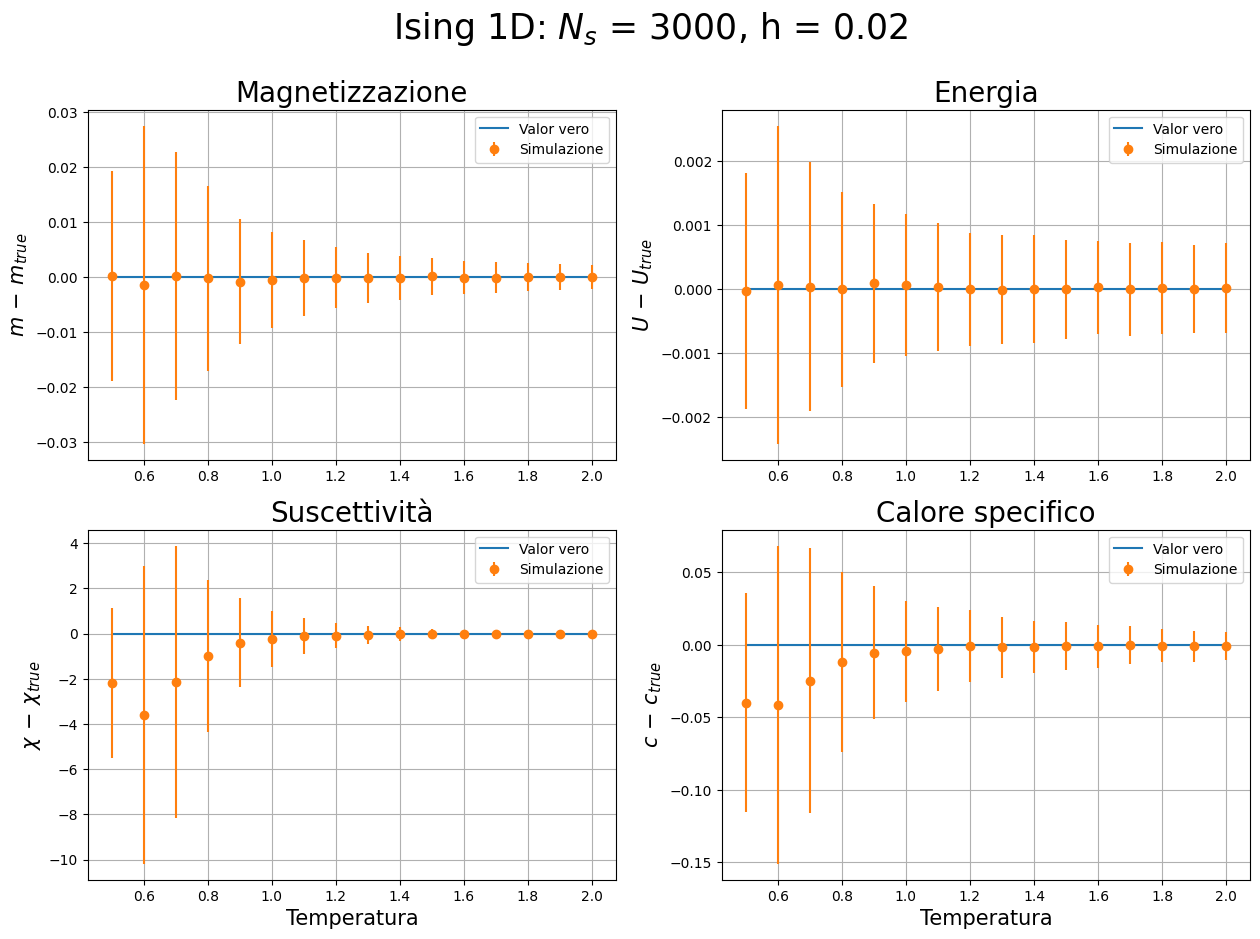

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0, 0].plot(t_camp, np.zeros(len(m_camp)), label = 'Valor vero')
ax[0, 0].errorbar(t_camp, magn_3000 - m_camp, yerr = magn_3000_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[0, 0].set_ylabel(r'$m\,-\,m_{true}$', fontsize = 15)
ax[0, 0].set_title(r'Magnetizzazione', fontsize = 20)
ax[0, 0].legend(loc = 'best')
ax[0, 0].grid(True)

ax[0, 1].plot(t_camp, np.zeros(len(t_camp)), label = 'Valor vero')
ax[0, 1].errorbar(t_camp, ene_3000 - ene_camp, yerr = ene_3000_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[0, 1].set_ylabel(r'$U\,-\,U_{true}$', fontsize = 15)
ax[0, 1].set_title(r'Energia', fontsize = 20)
ax[0, 1].legend(loc = 'best')
ax[0, 1].grid(True)

ax[1, 0].plot(t_camp, np.zeros(len(t_camp)), label = 'Valor vero')
ax[1, 0].errorbar(t_camp, chi_3000 - chi_camp, yerr = chi_3000_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[1, 0].set_xlabel('Temperatura', fontsize = 15)
ax[1, 0].set_ylabel(r'$\chi\,-\,\chi_{true}$', fontsize = 15)
ax[1, 0].set_title(r'Suscettività', fontsize = 20)
ax[1, 0].legend(loc = 'best')
ax[1, 0].grid(True)

ax[1, 1].plot(t_camp, np.zeros(len(t_camp)), label = 'Valor vero')
ax[1, 1].errorbar(t_camp, cp_3000 - cv_camp, yerr = cp_3000_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[1, 1].set_xlabel('Temperatura', fontsize = 15)
ax[1, 1].set_ylabel(r'$c\,-\,c_{true}$', fontsize = 15)
ax[1, 1].set_title(r'Calore specifico', fontsize = 20)
ax[1, 1].legend(loc = 'best')
ax[1, 1].grid(True)

fig.suptitle(r'Ising 1D: $N_s$ = 3000, h = 0.02', fontsize = 25)
plt.show()

<center>

<span style="color:blue; font-size:50px;"> N = 6000 </span>

</center>

In [14]:
size = '6000'

ene_6000 = np.zeros(len(temp))
ene_6000_err = np.zeros(len(temp))

magn_6000 = np.zeros(len(temp))
magn_6000_err = np.zeros(len(temp))

cp_6000 = np.zeros(len(temp))
cp_6000_err = np.zeros(len(temp))

chi_6000 = np.zeros(len(temp))
chi_6000_err = np.zeros(len(temp))


# Ciclo sulle varie temperature
for i in range(0, len(temp)):

    # Carico gli osservabili da file
    name = 'magn0.02/obs/obs_size' + size + '_t' + temp[i] + '.out'
    obs = np.loadtxt(name)


    # Valuto i valori medi
    ene_6000[i] = np.mean(obs[:, 1])
    ene_6000_err[i] = np.std(obs[:, 1], ddof=1)

    magn_6000[i] = np.mean(obs[:, 2])
    magn_6000_err[i] = np.std(obs[:, 2], ddof=1)
    
    cp_6000[i] = np.mean(obs[:, 3])
    cp_6000_err[i] = np.std(obs[:, 3], ddof=1)
    
    chi_6000[i] = np.mean(obs[:, 4])
    chi_6000_err[i] = np.std(obs[:, 4], ddof=1)


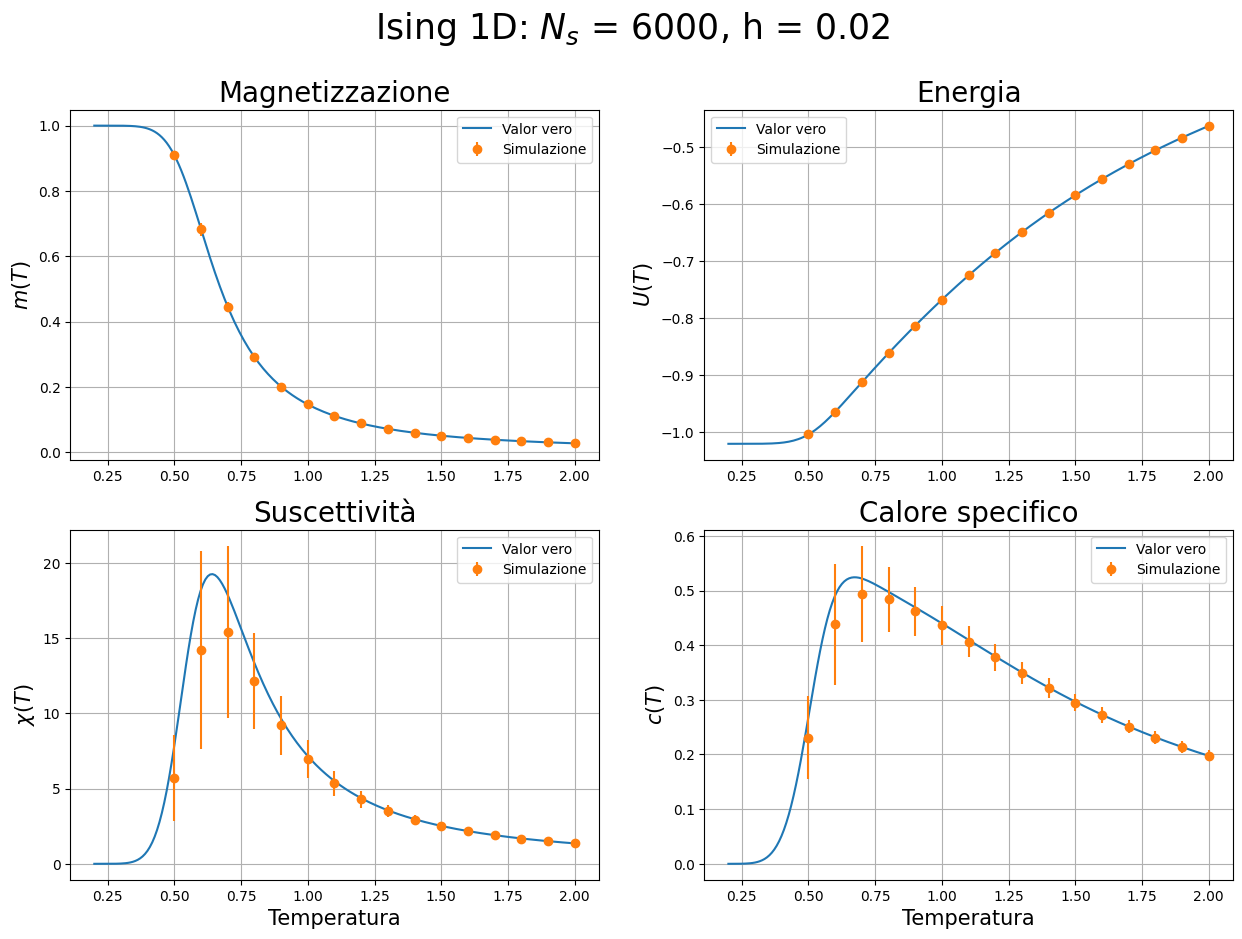

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0, 0].plot(T, m, label = 'Valor vero')
ax[0, 0].errorbar(t_camp, magn_6000, yerr = magn_6000_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[0, 0].set_ylabel(r'$m\left(T\right)$', fontsize = 15)
ax[0, 0].set_title(r'Magnetizzazione', fontsize = 20)
ax[0, 0].legend(loc = 'best')
ax[0, 0].grid(True)

ax[0, 1].plot(T, ene, label = 'Valor vero')
ax[0, 1].errorbar(t_camp, ene_6000, yerr = ene_6000_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[0, 1].set_ylabel(r'$U\left(T\right)$', fontsize = 15)
ax[0, 1].set_title(r'Energia', fontsize = 20)
ax[0, 1].legend(loc = 'best')
ax[0, 1].grid(True)

ax[1, 0].plot(T, chi, label = 'Valor vero')
ax[1, 0].errorbar(t_camp, chi_6000, yerr = chi_6000_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[1, 0].set_xlabel('Temperatura', fontsize = 15)
ax[1, 0].set_ylabel(r'$\chi\left(T\right)$', fontsize = 15)
ax[1, 0].set_title(r'Suscettività', fontsize = 20)
ax[1, 0].legend(loc = 'best')
ax[1, 0].grid(True)

ax[1, 1].plot(T, cv, label = 'Valor vero')
ax[1, 1].errorbar(t_camp, cp_6000, yerr = cp_6000_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[1, 1].set_xlabel('Temperatura', fontsize = 15)
ax[1, 1].set_ylabel(r'$c\left(T\right)$', fontsize = 15)
ax[1, 1].set_title(r'Calore specifico', fontsize = 20)
ax[1, 1].legend(loc = 'best')
ax[1, 1].grid(True)

fig.suptitle(r'Ising 1D: $N_s$ = 6000, h = 0.02', fontsize = 25)
plt.show()

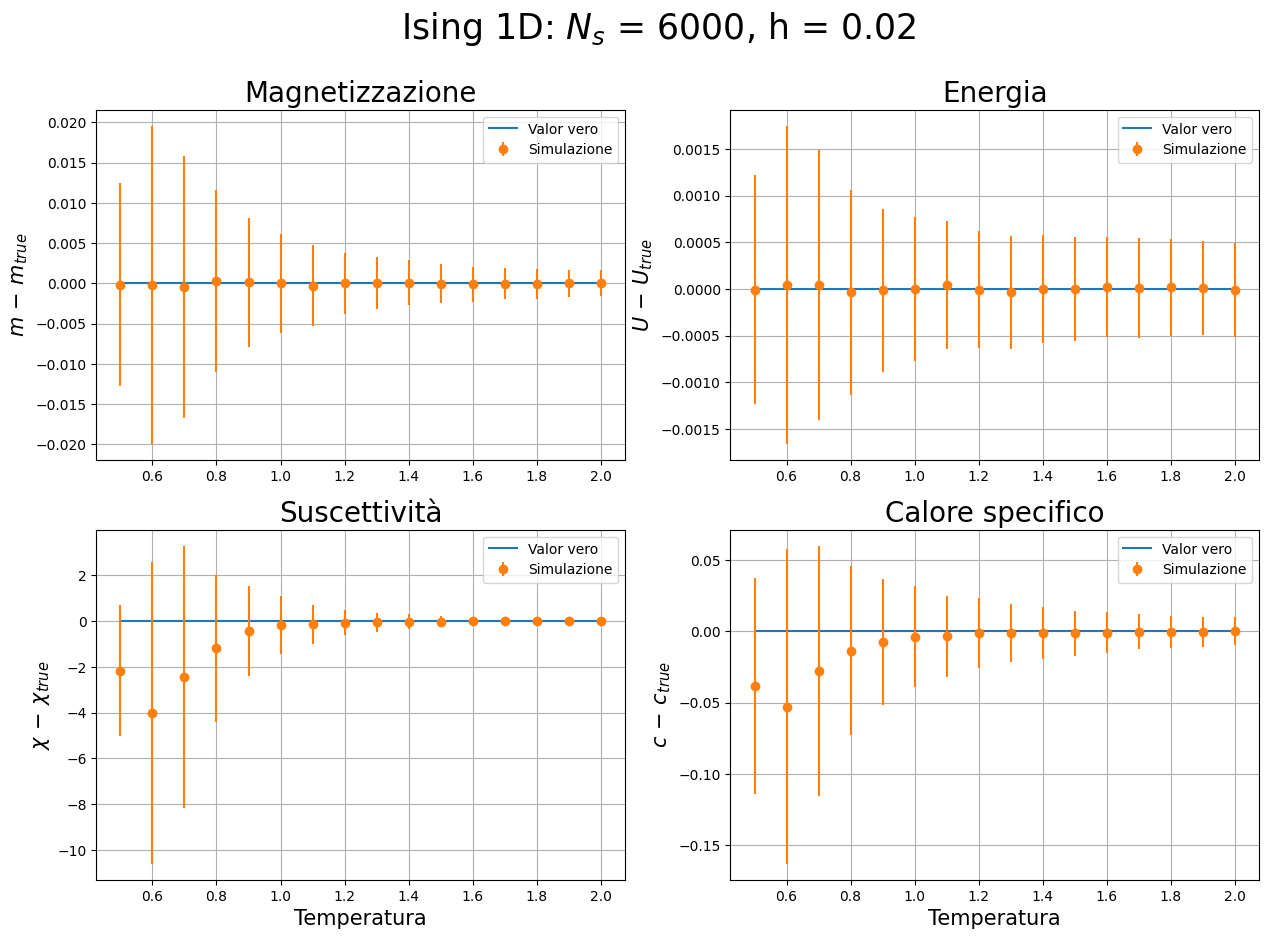

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0, 0].plot(t_camp, np.zeros(len(m_camp)), label = 'Valor vero')
ax[0, 0].errorbar(t_camp, magn_6000 - m_camp, yerr = magn_6000_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[0, 0].set_ylabel(r'$m\,-\,m_{true}$', fontsize = 15)
ax[0, 0].set_title(r'Magnetizzazione', fontsize = 20)
ax[0, 0].legend(loc = 'best')
ax[0, 0].grid(True)

ax[0, 1].plot(t_camp, np.zeros(len(t_camp)), label = 'Valor vero')
ax[0, 1].errorbar(t_camp, ene_6000 - ene_camp, yerr = ene_6000_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[0, 1].set_ylabel(r'$U\,-\,U_{true}$', fontsize = 15)
ax[0, 1].set_title(r'Energia', fontsize = 20)
ax[0, 1].legend(loc = 'best')
ax[0, 1].grid(True)

ax[1, 0].plot(t_camp, np.zeros(len(t_camp)), label = 'Valor vero')
ax[1, 0].errorbar(t_camp, chi_6000 - chi_camp, yerr = chi_6000_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[1, 0].set_xlabel('Temperatura', fontsize = 15)
ax[1, 0].set_ylabel(r'$\chi\,-\,\chi_{true}$', fontsize = 15)
ax[1, 0].set_title(r'Suscettività', fontsize = 20)
ax[1, 0].legend(loc = 'best')
ax[1, 0].grid(True)

ax[1, 1].plot(t_camp, np.zeros(len(t_camp)), label = 'Valor vero')
ax[1, 1].errorbar(t_camp, cp_6000 - cv_camp, yerr = cp_6000_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[1, 1].set_xlabel('Temperatura', fontsize = 15)
ax[1, 1].set_ylabel(r'$c\,-\,c_{true}$', fontsize = 15)
ax[1, 1].set_title(r'Calore specifico', fontsize = 20)
ax[1, 1].legend(loc = 'best')
ax[1, 1].grid(True)

fig.suptitle(r'Ising 1D: $N_s$ = 6000, h = 0.02', fontsize = 25)
plt.show()

<center>

<span style="color:blue; font-size:50px;"> N = 10000 </span>

</center>

In [17]:
size = '10000'

ene_10000 = np.zeros(len(temp))
ene_10000_err = np.zeros(len(temp))

magn_10000 = np.zeros(len(temp))
magn_10000_err = np.zeros(len(temp))

cp_10000 = np.zeros(len(temp))
cp_10000_err = np.zeros(len(temp))

chi_10000 = np.zeros(len(temp))
chi_10000_err = np.zeros(len(temp))


# Ciclo sulle varie temperature
for i in range(0, len(temp)):

    # Carico gli osservabili da file
    name = 'magn0.02/obs/obs_size' + size + '_t' + temp[i] + '.out'
    obs = np.loadtxt(name)


    # Valuto i valori medi
    ene_10000[i] = np.mean(obs[:, 1])
    ene_10000_err[i] = np.std(obs[:, 1], ddof=1)

    magn_10000[i] = np.mean(obs[:, 2])
    magn_10000_err[i] = np.std(obs[:, 2], ddof=1)
    
    cp_10000[i] = np.mean(obs[:, 3])
    cp_10000_err[i] = np.std(obs[:, 3], ddof=1)
    
    chi_10000[i] = np.mean(obs[:, 4])
    chi_10000_err[i] = np.std(obs[:, 4], ddof=1)

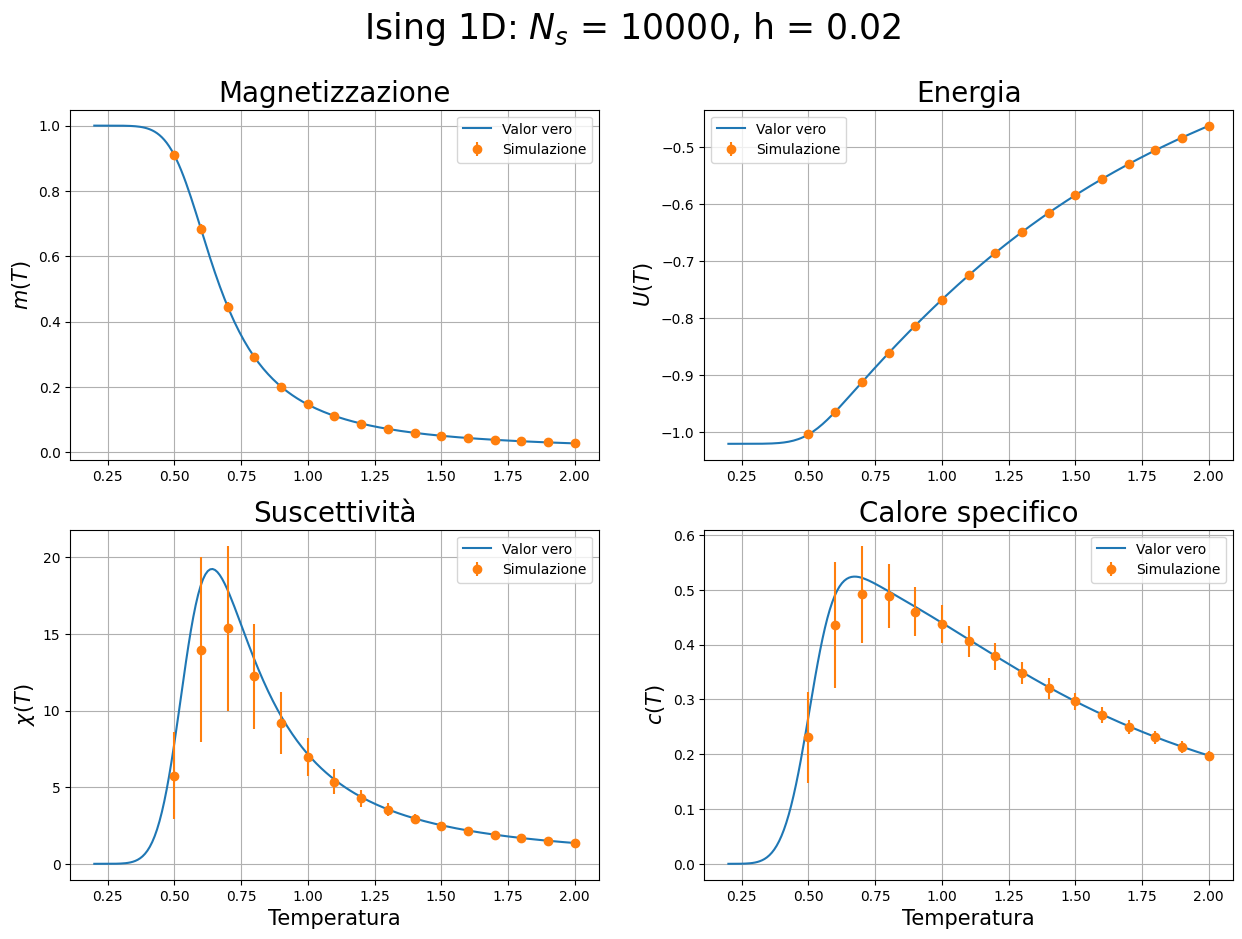

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0, 0].plot(T, m, label = 'Valor vero')
ax[0, 0].errorbar(t_camp, magn_10000, yerr = magn_10000_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[0, 0].set_ylabel(r'$m\left(T\right)$', fontsize = 15)
ax[0, 0].set_title(r'Magnetizzazione', fontsize = 20)
ax[0, 0].legend(loc = 'best')
ax[0, 0].grid(True)

ax[0, 1].plot(T, ene, label = 'Valor vero')
ax[0, 1].errorbar(t_camp, ene_10000, yerr = ene_10000_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[0, 1].set_ylabel(r'$U\left(T\right)$', fontsize = 15)
ax[0, 1].set_title(r'Energia', fontsize = 20)
ax[0, 1].legend(loc = 'best')
ax[0, 1].grid(True)

ax[1, 0].plot(T, chi, label = 'Valor vero')
ax[1, 0].errorbar(t_camp, chi_10000, yerr = chi_10000_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[1, 0].set_xlabel('Temperatura', fontsize = 15)
ax[1, 0].set_ylabel(r'$\chi\left(T\right)$', fontsize = 15)
ax[1, 0].set_title(r'Suscettività', fontsize = 20)
ax[1, 0].legend(loc = 'best')
ax[1, 0].grid(True)

ax[1, 1].plot(T, cv, label = 'Valor vero')
ax[1, 1].errorbar(t_camp, cp_10000, yerr = cp_10000_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[1, 1].set_xlabel('Temperatura', fontsize = 15)
ax[1, 1].set_ylabel(r'$c\left(T\right)$', fontsize = 15)
ax[1, 1].set_title(r'Calore specifico', fontsize = 20)
ax[1, 1].legend(loc = 'best')
ax[1, 1].grid(True)

fig.suptitle(r'Ising 1D: $N_s$ = 10000, h = 0.02', fontsize = 25)
plt.show()

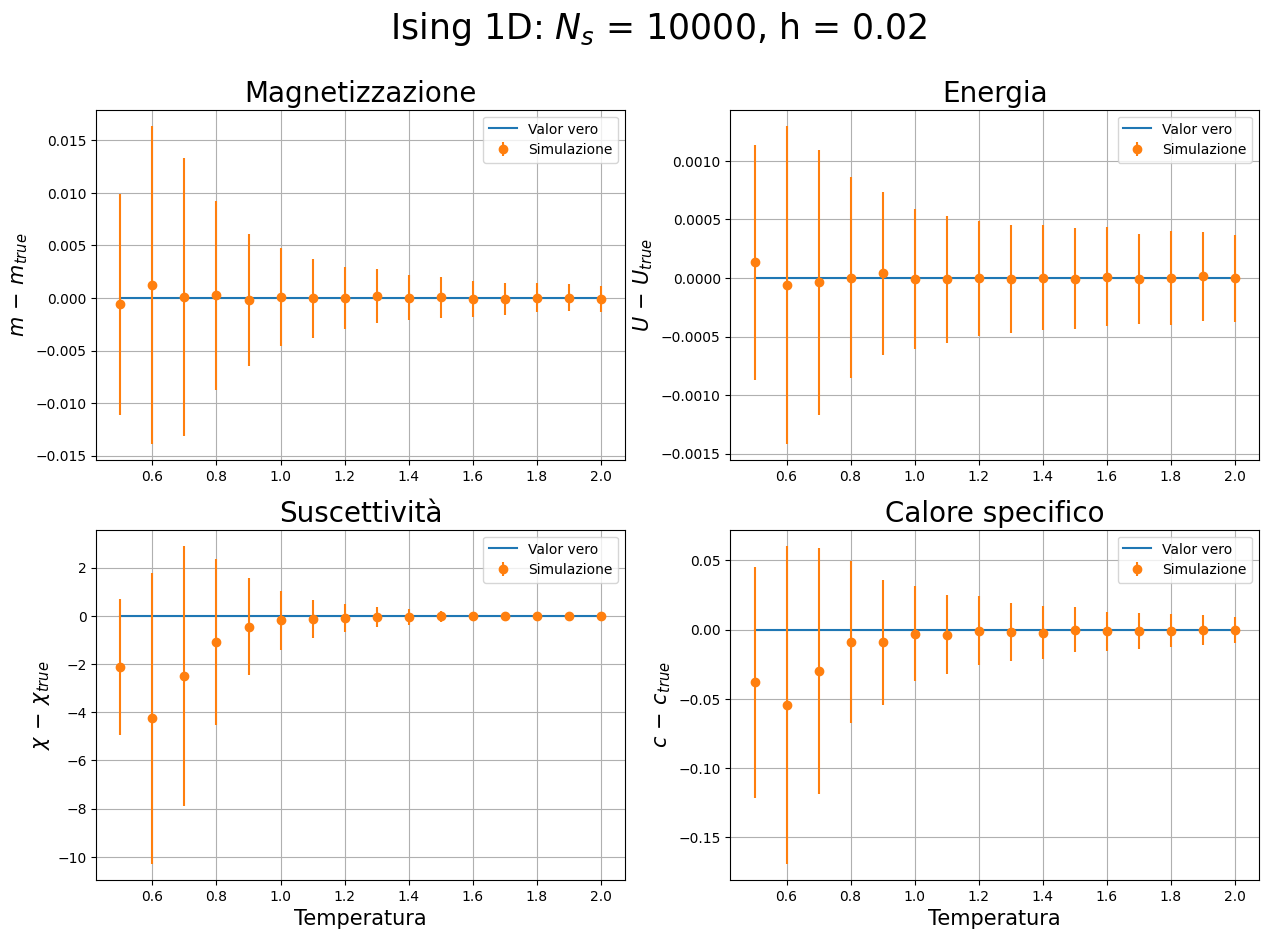

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0, 0].plot(t_camp, np.zeros(len(m_camp)), label = 'Valor vero')
ax[0, 0].errorbar(t_camp, magn_10000 - m_camp, yerr = magn_10000_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[0, 0].set_ylabel(r'$m\,-\,m_{true}$', fontsize = 15)
ax[0, 0].set_title(r'Magnetizzazione', fontsize = 20)
ax[0, 0].legend(loc = 'best')
ax[0, 0].grid(True)

ax[0, 1].plot(t_camp, np.zeros(len(t_camp)), label = 'Valor vero')
ax[0, 1].errorbar(t_camp, ene_10000 - ene_camp, yerr = ene_10000_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[0, 1].set_ylabel(r'$U\,-\,U_{true}$', fontsize = 15)
ax[0, 1].set_title(r'Energia', fontsize = 20)
ax[0, 1].legend(loc = 'best')
ax[0, 1].grid(True)

ax[1, 0].plot(t_camp, np.zeros(len(t_camp)), label = 'Valor vero')
ax[1, 0].errorbar(t_camp, chi_10000 - chi_camp, yerr = chi_10000_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[1, 0].set_xlabel('Temperatura', fontsize = 15)
ax[1, 0].set_ylabel(r'$\chi\,-\,\chi_{true}$', fontsize = 15)
ax[1, 0].set_title(r'Suscettività', fontsize = 20)
ax[1, 0].legend(loc = 'best')
ax[1, 0].grid(True)

ax[1, 1].plot(t_camp, np.zeros(len(t_camp)), label = 'Valor vero')
ax[1, 1].errorbar(t_camp, cp_10000 - cv_camp, yerr = cp_10000_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[1, 1].set_xlabel('Temperatura', fontsize = 15)
ax[1, 1].set_ylabel(r'$c\,-\,c_{true}$', fontsize = 15)
ax[1, 1].set_title(r'Calore specifico', fontsize = 20)
ax[1, 1].legend(loc = 'best')
ax[1, 1].grid(True)

fig.suptitle(r'Ising 1D: $N_s$ = 10000, h = 0.02', fontsize = 25)
plt.show()

<center>

# <span style="color:green; font-size:60px;"> h = 0.0 </span>

</center>

<center>

<span style="color:blue; font-size:50px;"> Magnetizzazione</span>

</center>

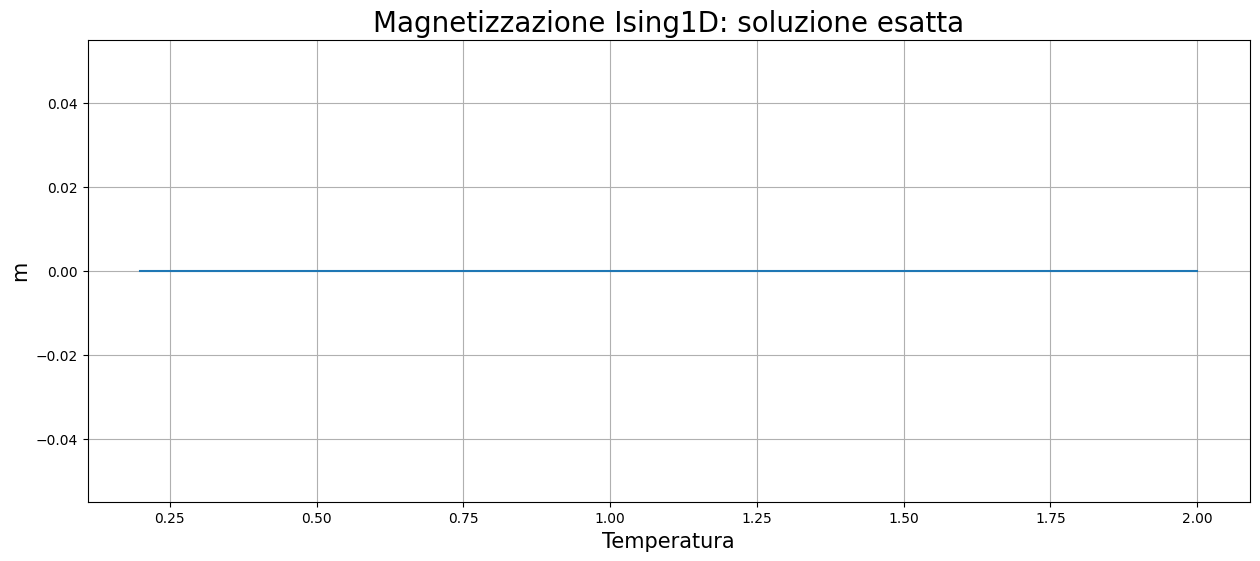

In [2]:
T = np.linspace(0.2, 2.0, 200)
beta = 1/T
h = 0.0
J = 1.0

m_0 = np.sinh(beta * h)/np.sqrt(np.exp(-4*beta*J) + np.sinh(beta * h)**2)


fig = plt.figure(figsize = (15, 6))

plt.plot(T, m_0, label = 'Valor vero')

plt.title("Magnetizzazione Ising1D: soluzione esatta", fontsize = 20)
plt.xlabel("Temperatura", fontsize = 15)
plt.ylabel("m", fontsize = 15)

plt.grid(True)
plt.show()

<center>

<span style="color:blue; font-size:50px;"> Energia interna</span>

</center>

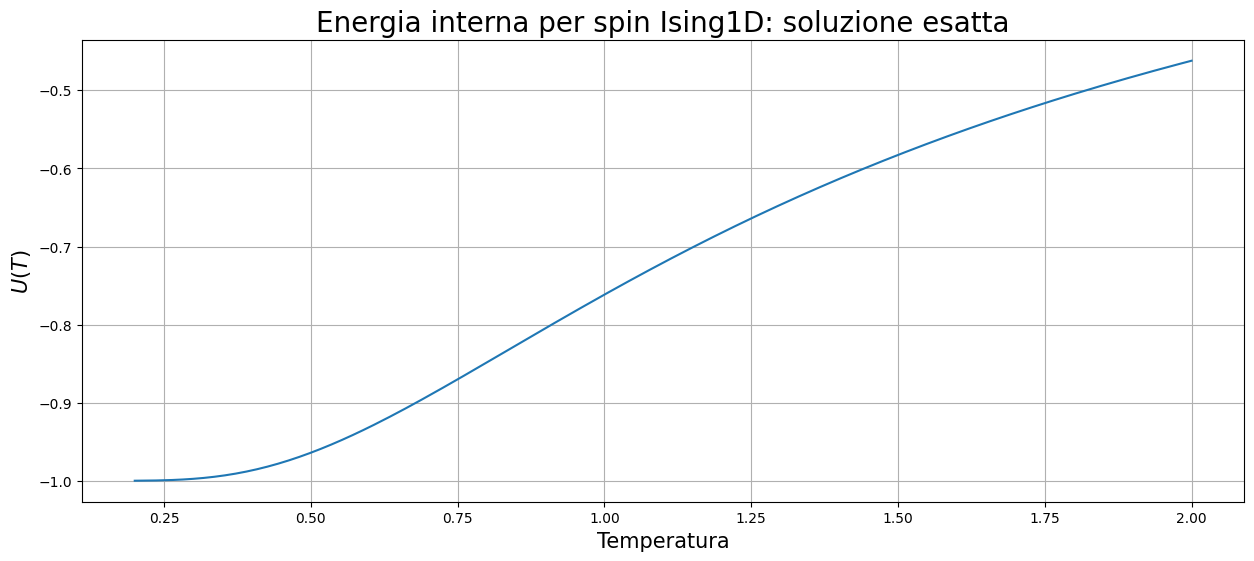

In [3]:
T = np.linspace(0.2, 2.0, 200)
beta = 1/T
h = 0.00
J = 1.0

ene_0 = - J * np.tanh(beta * J)

fig = plt.figure(figsize = (15, 6))

plt.plot(T, ene_0)


plt.title("Energia interna per spin Ising1D: soluzione esatta", fontsize = 20)
plt.xlabel("Temperatura", fontsize = 15)
plt.ylabel(r"$U\left(T\right)$", fontsize = 15)

plt.grid(True)
plt.show()

<center>

<span style="color:blue; font-size:50px;"> Suscettività magnetica</span>

</center>

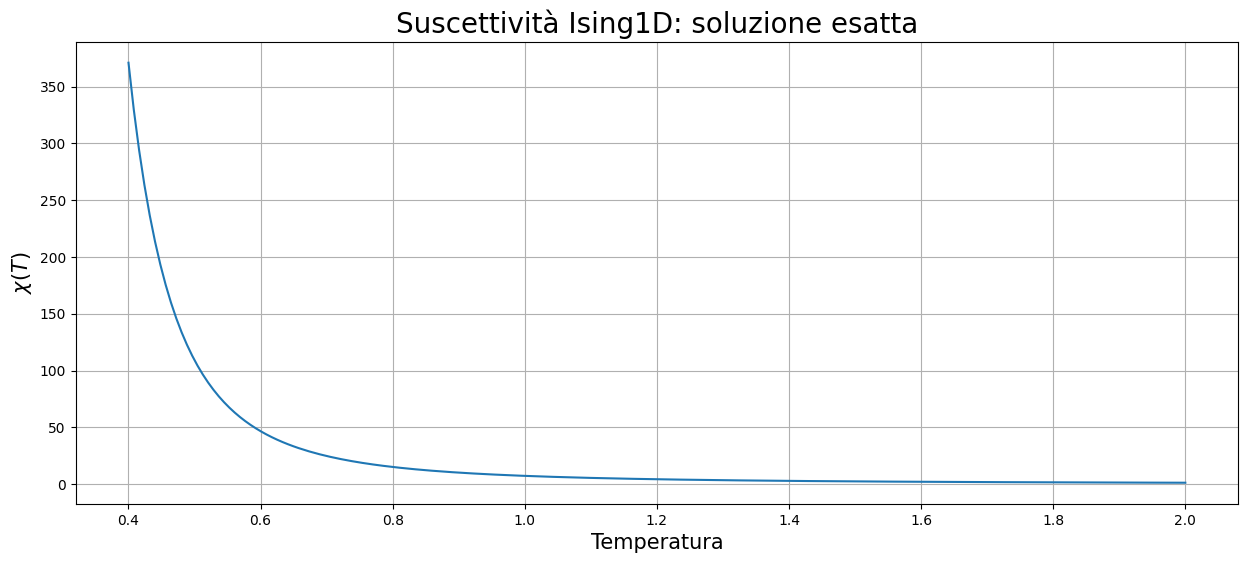

In [4]:
T = np.linspace(0.4, 2.0, 200)
beta = 1/T
J = 1.0

chi_0 = beta * np.exp(2 * beta * J)
fig = plt.figure(figsize = (15, 6))

plt.plot(T, chi_0)

plt.title("Suscettività Ising1D: soluzione esatta", fontsize = 20)
plt.xlabel("Temperatura", fontsize = 15)
plt.ylabel(r"$\chi\left(T\right)$", fontsize = 15)

plt.grid(True)
plt.show()

<center>

<span style="color:blue; font-size:50px;"> Calore specifico</span>

</center>

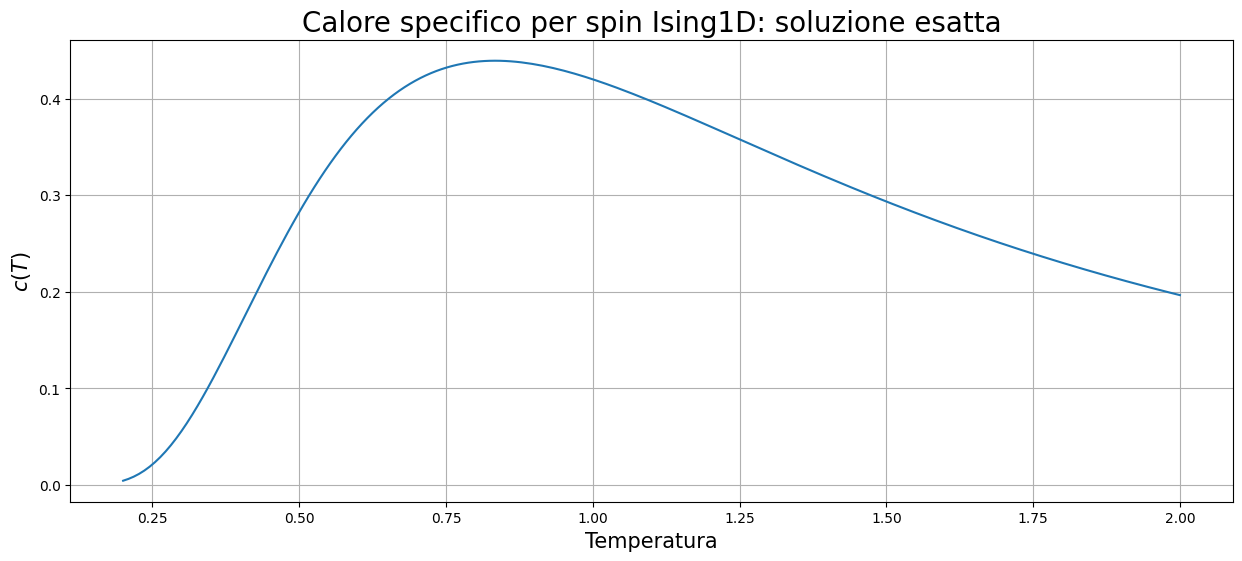

In [5]:
T = np.linspace(0.2, 2.0, 200)
beta = 1/T
J = 1.0

beta_J = beta * J
cv_0 = (J * beta)**2 * (1/pow(np.cosh(beta * J), 2))


fig = plt.figure(figsize = (15, 6))

plt.plot(T, cv_0)

plt.title("Calore specifico per spin Ising1D: soluzione esatta", fontsize = 20)
plt.xlabel("Temperatura", fontsize = 15)
plt.ylabel(r"$c\left(T\right)$", fontsize = 15)

plt.grid(True)
plt.show()

<center>

# Confronto con risultati simulativi

</center>

In [6]:
beta_camp = 1/t_camp
J = 1.0


# Magnetizzazione per confronto
m_camp_0 = np.zeros(len(beta_camp))


# Suscettività per confronto
chi_camp_0 = beta_camp * np.exp(2 * beta_camp * J)

# Energia per confronto 
ene_camp_0 = - J * np.tanh(beta_camp * J)


# Calore specifico per confronto
cv_camp_0 = (J * beta_camp)**2 * (1/pow(np.cosh(beta_camp * J), 2))

<center>

<span style="color:blue; font-size:50px;"> N = 1000 </span>

</center>

In [7]:
size = '1000'

ene_1000_0 = np.zeros(len(temp))
ene_1000_0_err = np.zeros(len(temp))

magn_1000_0 = np.zeros(len(temp))
magn_1000_0_err = np.zeros(len(temp))

cp_1000_0 = np.zeros(len(temp))
cp_1000_0_err = np.zeros(len(temp))

chi_1000_0 = np.zeros(len(temp))
chi_1000_0_err = np.zeros(len(temp))


# Ciclo sulle varie temperature
for i in range(0, len(temp)):

    # Carico gli osservabili da file
    name = 'magn0.0/obs/obs_size' + size + '_t' + temp[i] + '.out'
    obs = np.loadtxt(name)


    # Valuto i valori medi
    ene_1000_0[i] = np.mean(obs[:, 1])
    ene_1000_0_err[i] = np.std(obs[:, 1], ddof=1)

    magn_1000_0[i] = np.mean(obs[:, 2])
    magn_1000_0_err[i] = np.std(obs[:, 2], ddof=1)
    
    cp_1000_0[i] = np.mean(obs[:, 3])
    cp_1000_0_err[i] = np.std(obs[:, 3], ddof=1)
    
    chi_1000_0[i] = np.mean(obs[:, 4])
    chi_1000_0_err[i] = np.std(obs[:, 4], ddof=1)

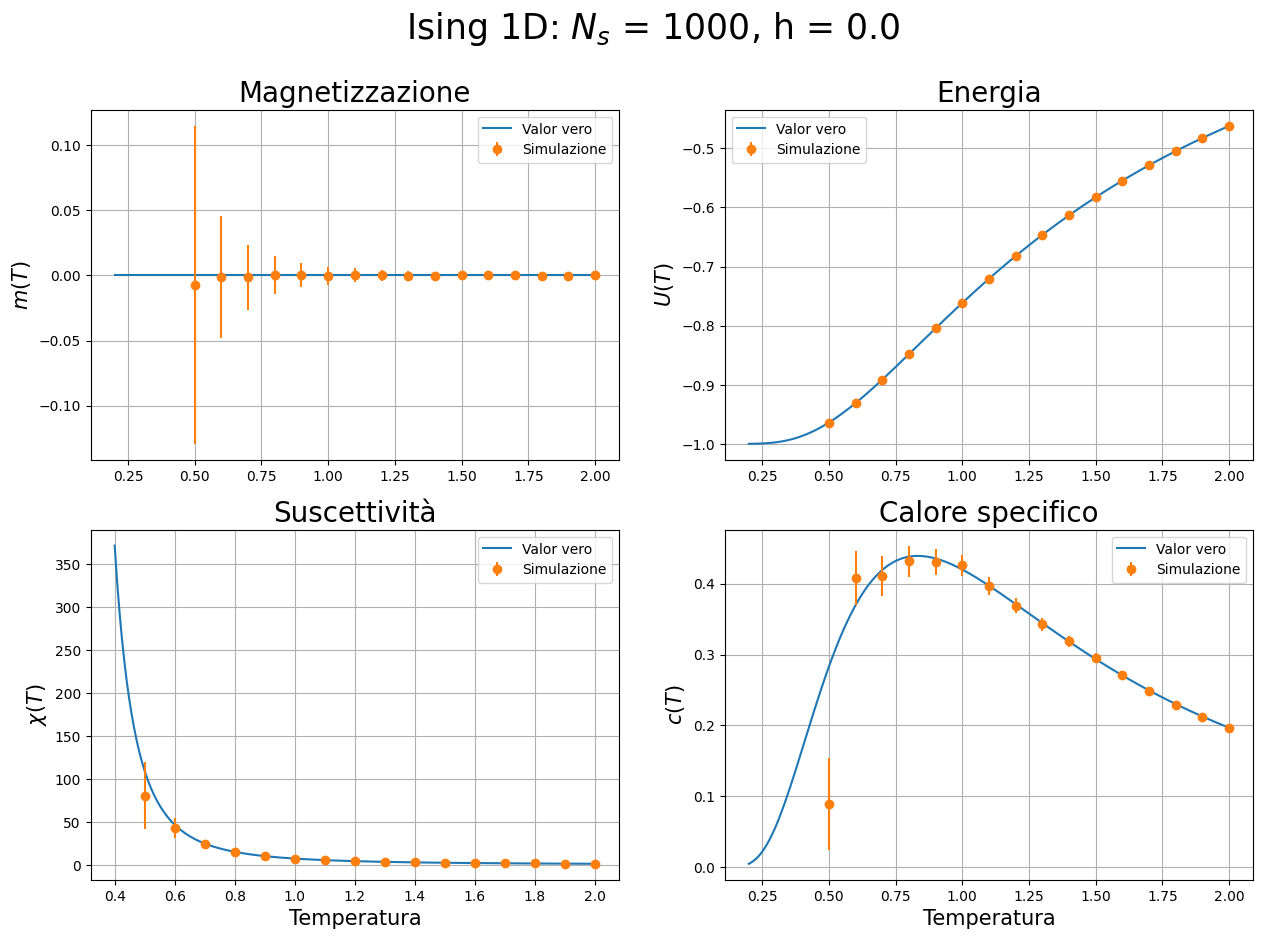

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

T = np.linspace(0.2, 2.0, 200)
ax[0, 0].plot(T, m_0, label = 'Valor vero')
ax[0, 0].errorbar(t_camp, magn_1000_0, yerr = magn_1000_0_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[0, 0].set_ylabel(r'$m\left(T\right)$', fontsize = 15)
ax[0, 0].set_title(r'Magnetizzazione', fontsize = 20)
ax[0, 0].legend(loc = 'best')
ax[0, 0].grid(True)

T = np.linspace(0.2, 2.0, 200)
ax[0, 1].plot(T, ene_0, label = 'Valor vero')
ax[0, 1].errorbar(t_camp, ene_1000_0, yerr = ene_1000_0_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[0, 1].set_ylabel(r'$U\left(T\right)$', fontsize = 15)
ax[0, 1].set_title(r'Energia', fontsize = 20)
ax[0, 1].legend(loc = 'best')
ax[0, 1].grid(True)

T = np.linspace(0.4, 2.0, 200)
ax[1, 0].plot(T, chi_0, label = 'Valor vero')
ax[1, 0].errorbar(t_camp, chi_1000_0, yerr = chi_1000_0_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[1, 0].set_xlabel('Temperatura', fontsize = 15)
ax[1, 0].set_ylabel(r'$\chi\left(T\right)$', fontsize = 15)
ax[1, 0].set_title(r'Suscettività', fontsize = 20)
ax[1, 0].legend(loc = 'best')
ax[1, 0].grid(True)

T = np.linspace(0.2, 2.0, 200)
ax[1, 1].plot(T, cv_0, label = 'Valor vero')
ax[1, 1].errorbar(t_camp, cp_1000_0, yerr = cp_1000_0_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[1, 1].set_xlabel('Temperatura', fontsize = 15)
ax[1, 1].set_ylabel(r'$c\left(T\right)$', fontsize = 15)
ax[1, 1].set_title(r'Calore specifico', fontsize = 20)
ax[1, 1].legend(loc = 'best')
ax[1, 1].grid(True)

fig.suptitle(r'Ising 1D: $N_s$ = 1000, h = 0.0', fontsize = 25)
plt.show()

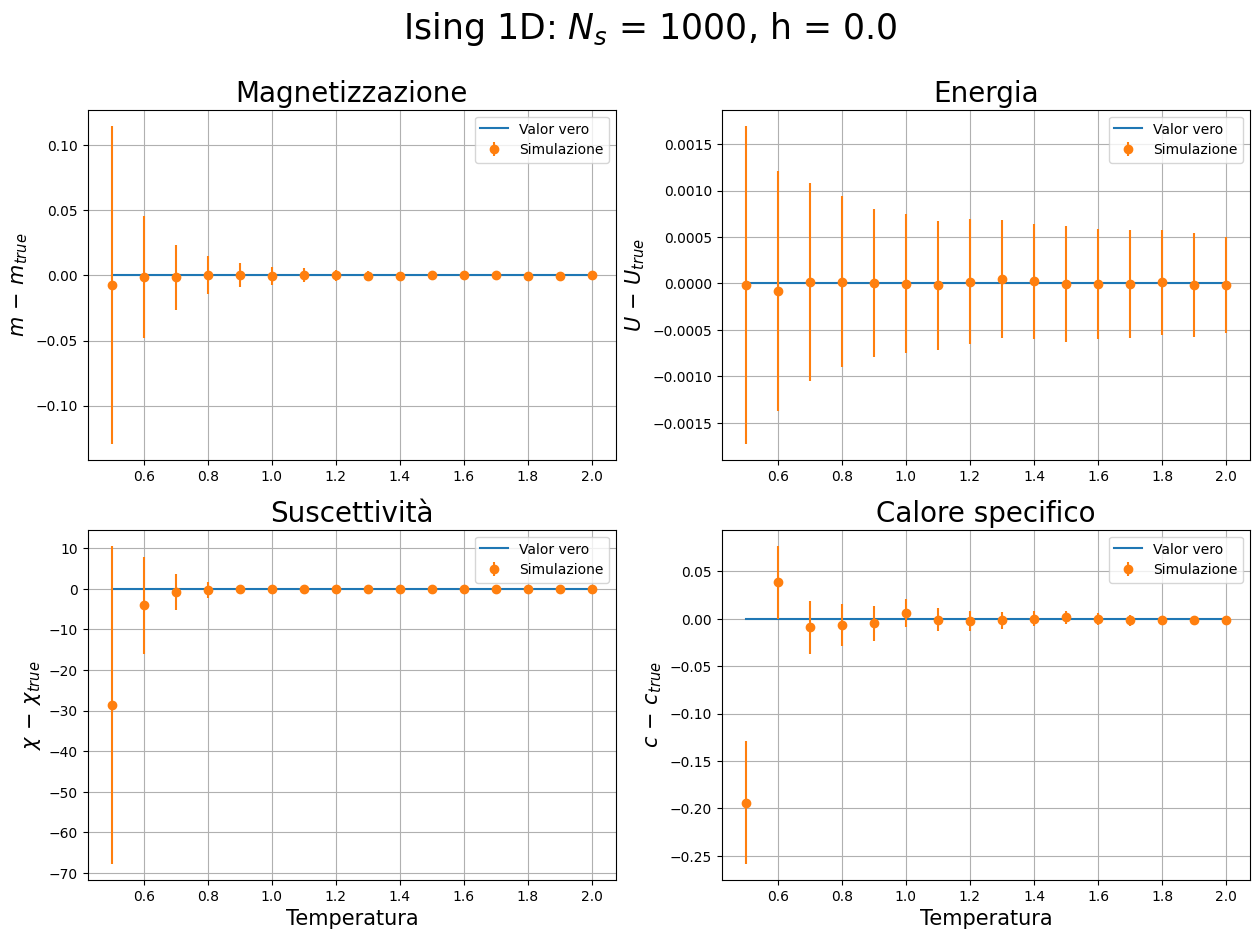

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

T = np.linspace(0.2, 2.0, 200)
ax[0, 0].plot(t_camp, np.zeros(len(t_camp)), label = 'Valor vero')
ax[0, 0].errorbar(t_camp, magn_1000_0 - m_camp_0, yerr = magn_1000_0_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[0, 0].set_ylabel(r'$m\,-\,m_{true}$', fontsize = 15)
ax[0, 0].set_title(r'Magnetizzazione', fontsize = 20)
ax[0, 0].legend(loc = 'best')
ax[0, 0].grid(True)

ax[0, 1].plot(t_camp, np.zeros(len(t_camp)), label = 'Valor vero')
ax[0, 1].errorbar(t_camp, ene_1000_0 - ene_camp_0, yerr = ene_1000_0_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[0, 1].set_ylabel(r'$U\,-\,U_{true}$', fontsize = 15)
ax[0, 1].set_title(r'Energia', fontsize = 20)
ax[0, 1].legend(loc = 'best')
ax[0, 1].grid(True)

T = np.linspace(0.4, 2.0, 200)
ax[1, 0].plot(t_camp, np.zeros(len(t_camp)), label = 'Valor vero')
ax[1, 0].errorbar(t_camp, chi_1000_0 - chi_camp_0, yerr = chi_1000_0_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[1, 0].set_xlabel('Temperatura', fontsize = 15)
ax[1, 0].set_ylabel(r'$\chi\,-\,\chi_{true}$', fontsize = 15)
ax[1, 0].set_title(r'Suscettività', fontsize = 20)
ax[1, 0].legend(loc = 'best')
ax[1, 0].grid(True)

T = np.linspace(0.2, 2.0, 200)
ax[1, 1].plot(t_camp, np.zeros(len(t_camp)), label = 'Valor vero')
ax[1, 1].errorbar(t_camp, cp_1000_0 - cv_camp_0, yerr = cp_1000_0_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[1, 1].set_xlabel('Temperatura', fontsize = 15)
ax[1, 1].set_ylabel(r'$c\,-\,c_{true}$', fontsize = 15)
ax[1, 1].set_title(r'Calore specifico', fontsize = 20)
ax[1, 1].legend(loc = 'best')
ax[1, 1].grid(True)

fig.suptitle(r'Ising 1D: $N_s$ = 1000, h = 0.0', fontsize = 25)
plt.show()

<center>

<span style="color:blue; font-size:50px;"> N = 3000 </span>

</center>

In [10]:
size = '3000'

ene_3000_0 = np.zeros(len(temp))
ene_3000_0_err = np.zeros(len(temp))

magn_3000_0 = np.zeros(len(temp))
magn_3000_0_err = np.zeros(len(temp))

cp_3000_0 = np.zeros(len(temp))
cp_3000_0_err = np.zeros(len(temp))

chi_3000_0 = np.zeros(len(temp))
chi_3000_0_err = np.zeros(len(temp))


# Ciclo sulle varie temperature
for i in range(0, len(temp)):

    # Carico gli osservabili da file
    name = 'magn0.0/obs/obs_size' + size + '_t' + temp[i] + '.out'
    obs = np.loadtxt(name)


    # Valuto i valori medi
    ene_3000_0[i] = np.mean(obs[:, 1])
    ene_3000_0_err[i] = np.std(obs[:, 1], ddof=1)

    magn_3000_0[i] = np.mean(obs[:, 2])
    magn_3000_0_err[i] = np.std(obs[:, 2], ddof=1)
    
    cp_3000_0[i] = np.mean(obs[:, 3])
    cp_3000_0_err[i] = np.std(obs[:, 3], ddof=1)
    
    chi_3000_0[i] = np.mean(obs[:, 4])
    chi_3000_0_err[i] = np.std(obs[:, 4], ddof=1)

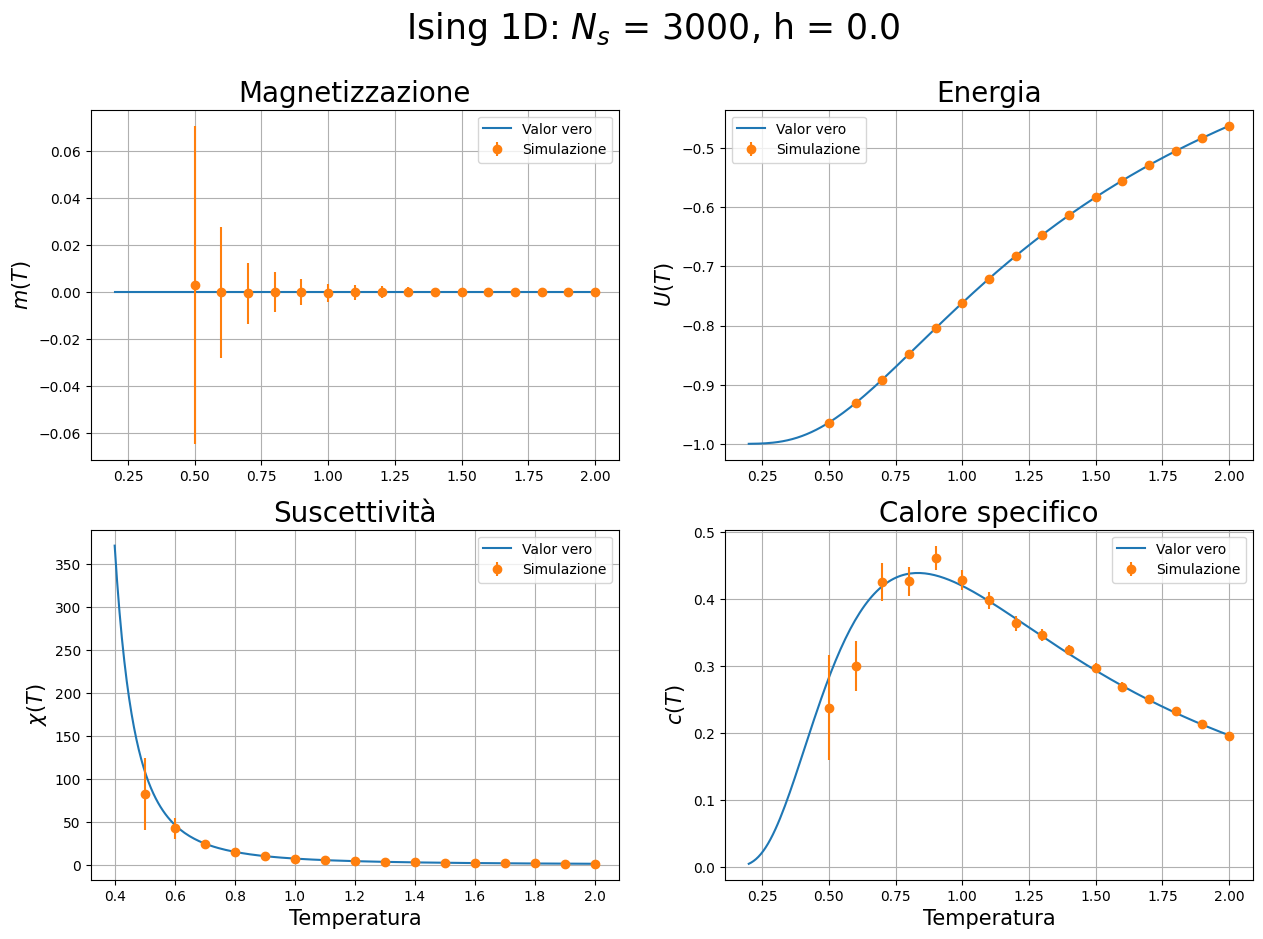

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

T = np.linspace(0.2, 2.0, 200)
ax[0, 0].plot(T, m_0, label = 'Valor vero')
ax[0, 0].errorbar(t_camp, magn_3000_0, yerr = magn_3000_0_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[0, 0].set_ylabel(r'$m\left(T\right)$', fontsize = 15)
ax[0, 0].set_title(r'Magnetizzazione', fontsize = 20)
ax[0, 0].legend(loc = 'best')
ax[0, 0].grid(True)

ax[0, 1].plot(T, ene_0, label = 'Valor vero')
ax[0, 1].errorbar(t_camp, ene_3000_0, yerr = ene_3000_0_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[0, 1].set_ylabel(r'$U\left(T\right)$', fontsize = 15)
ax[0, 1].set_title(r'Energia', fontsize = 20)
ax[0, 1].legend(loc = 'best')
ax[0, 1].grid(True)

T = np.linspace(0.4, 2.0, 200)
ax[1, 0].plot(T, chi_0, label = 'Valor vero')
ax[1, 0].errorbar(t_camp, chi_3000_0, yerr = chi_3000_0_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[1, 0].set_xlabel('Temperatura', fontsize = 15)
ax[1, 0].set_ylabel(r'$\chi\left(T\right)$', fontsize = 15)
ax[1, 0].set_title(r'Suscettività', fontsize = 20)
ax[1, 0].legend(loc = 'best')
ax[1, 0].grid(True)

T = np.linspace(0.2, 2.0, 200)
ax[1, 1].plot(T, cv_0, label = 'Valor vero')
ax[1, 1].errorbar(t_camp, cp_3000_0, yerr = cp_3000_0_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[1, 1].set_xlabel('Temperatura', fontsize = 15)
ax[1, 1].set_ylabel(r'$c\left(T\right)$', fontsize = 15)
ax[1, 1].set_title(r'Calore specifico', fontsize = 20)
ax[1, 1].legend(loc = 'best')
ax[1, 1].grid(True)

fig.suptitle(r'Ising 1D: $N_s$ = 3000, h = 0.0', fontsize = 25)
plt.show()

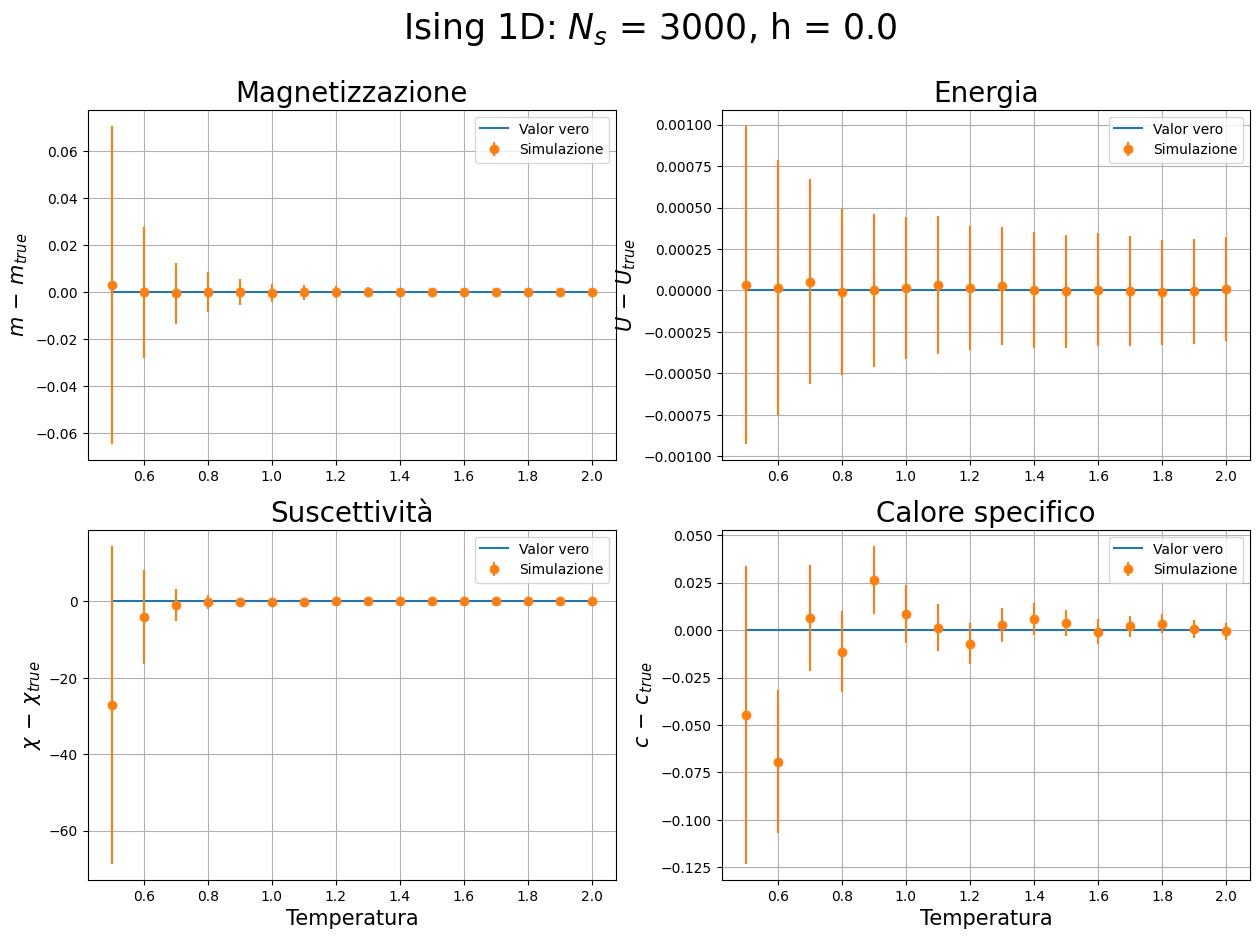

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

T = np.linspace(0.2, 2.0, 200)
ax[0, 0].plot(t_camp, np.zeros(len(t_camp)), label = 'Valor vero')
ax[0, 0].errorbar(t_camp, magn_3000_0 - m_camp_0, yerr = magn_3000_0_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[0, 0].set_ylabel(r'$m\,-\,m_{true}$', fontsize = 15)
ax[0, 0].set_title(r'Magnetizzazione', fontsize = 20)
ax[0, 0].legend(loc = 'best')
ax[0, 0].grid(True)

ax[0, 1].plot(t_camp, np.zeros(len(t_camp)), label = 'Valor vero')
ax[0, 1].errorbar(t_camp, ene_3000_0 - ene_camp_0, yerr = ene_3000_0_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[0, 1].set_ylabel(r'$U\,-\,U_{true}$', fontsize = 15)
ax[0, 1].set_title(r'Energia', fontsize = 20)
ax[0, 1].legend(loc = 'best')
ax[0, 1].grid(True)

T = np.linspace(0.4, 2.0, 200)
ax[1, 0].plot(t_camp, np.zeros(len(t_camp)), label = 'Valor vero')
ax[1, 0].errorbar(t_camp, chi_3000_0 - chi_camp_0, yerr = chi_3000_0_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[1, 0].set_xlabel('Temperatura', fontsize = 15)
ax[1, 0].set_ylabel(r'$\chi\,-\,\chi_{true}$', fontsize = 15)
ax[1, 0].set_title(r'Suscettività', fontsize = 20)
ax[1, 0].legend(loc = 'best')
ax[1, 0].grid(True)

T = np.linspace(0.2, 2.0, 200)
ax[1, 1].plot(t_camp, np.zeros(len(t_camp)), label = 'Valor vero')
ax[1, 1].errorbar(t_camp, cp_3000_0 - cv_camp_0, yerr = cp_3000_0_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[1, 1].set_xlabel('Temperatura', fontsize = 15)
ax[1, 1].set_ylabel(r'$c\,-\,c_{true}$', fontsize = 15)
ax[1, 1].set_title(r'Calore specifico', fontsize = 20)
ax[1, 1].legend(loc = 'best')
ax[1, 1].grid(True)

fig.suptitle(r'Ising 1D: $N_s$ = 3000, h = 0.0', fontsize = 25)
plt.show()

<center>

<span style="color:blue; font-size:50px;"> N = 6000 </span>

</center>

In [16]:
size = '6000'

ene_6000_0 = np.zeros(len(temp))
ene_6000_0_err = np.zeros(len(temp))

magn_6000_0 = np.zeros(len(temp))
magn_6000_0_err = np.zeros(len(temp))

cp_6000_0 = np.zeros(len(temp))
cp_6000_0_err = np.zeros(len(temp))

chi_6000_0 = np.zeros(len(temp))
chi_6000_0_err = np.zeros(len(temp))


# Ciclo sulle varie temperature
for i in range(0, len(temp)):

    # Carico gli osservabili da file
    name = 'magn0.0/obs/obs_size' + size + '_t' + temp[i] + '.out'
    obs = np.loadtxt(name)


    # Valuto i valori medi
    ene_6000_0[i] = np.mean(obs[:, 1])
    ene_6000_0_err[i] = np.std(obs[:, 1], ddof=1)

    magn_6000_0[i] = np.mean(obs[:, 2])
    magn_6000_0_err[i] = np.std(obs[:, 2], ddof=1)
    
    cp_6000_0[i] = np.mean(obs[:, 3])
    cp_6000_0_err[i] = np.std(obs[:, 3], ddof=1)
    
    chi_6000_0[i] = np.mean(obs[:, 4])
    chi_6000_0_err[i] = np.std(obs[:, 4], ddof=1)

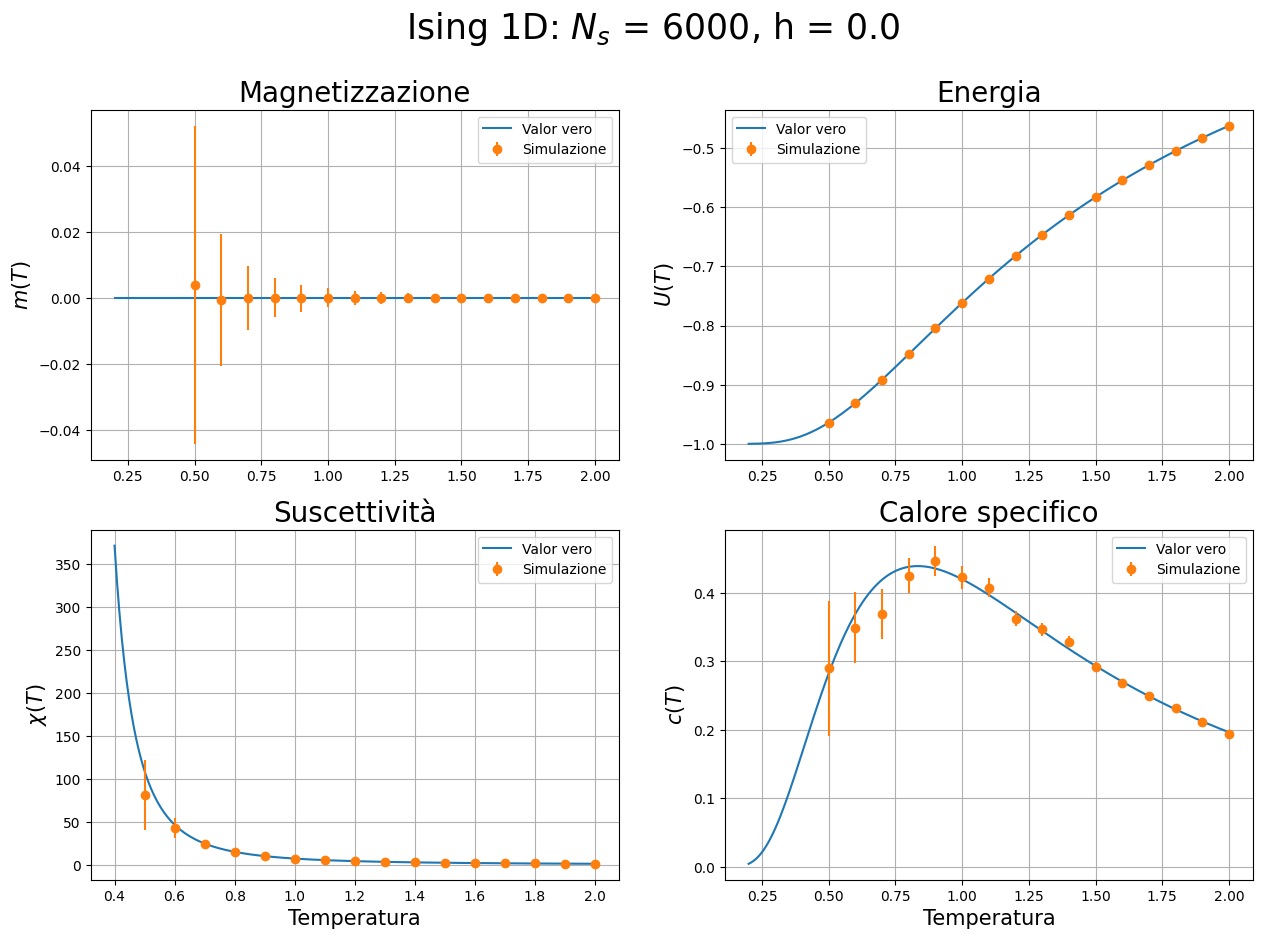

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

T = np.linspace(0.2, 2.0, 200)
ax[0, 0].plot(T, m_0, label = 'Valor vero')
ax[0, 0].errorbar(t_camp, magn_6000_0, yerr = magn_6000_0_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[0, 0].set_ylabel(r'$m\left(T\right)$', fontsize = 15)
ax[0, 0].set_title(r'Magnetizzazione', fontsize = 20)
ax[0, 0].legend(loc = 'best')
ax[0, 0].grid(True)

ax[0, 1].plot(T, ene_0, label = 'Valor vero')
ax[0, 1].errorbar(t_camp, ene_6000_0, yerr = ene_6000_0_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[0, 1].set_ylabel(r'$U\left(T\right)$', fontsize = 15)
ax[0, 1].set_title(r'Energia', fontsize = 20)
ax[0, 1].legend(loc = 'best')
ax[0, 1].grid(True)

T = np.linspace(0.4, 2.0, 200)
ax[1, 0].plot(T, chi_0, label = 'Valor vero')
ax[1, 0].errorbar(t_camp, chi_6000_0, yerr = chi_6000_0_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[1, 0].set_xlabel('Temperatura', fontsize = 15)
ax[1, 0].set_ylabel(r'$\chi\left(T\right)$', fontsize = 15)
ax[1, 0].set_title(r'Suscettività', fontsize = 20)
ax[1, 0].legend(loc = 'best')
ax[1, 0].grid(True)

T = np.linspace(0.2, 2.0, 200)
ax[1, 1].plot(T, cv_0, label = 'Valor vero')
ax[1, 1].errorbar(t_camp, cp_6000_0, yerr = cp_6000_0_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[1, 1].set_xlabel('Temperatura', fontsize = 15)
ax[1, 1].set_ylabel(r'$c\left(T\right)$', fontsize = 15)
ax[1, 1].set_title(r'Calore specifico', fontsize = 20)
ax[1, 1].legend(loc = 'best')
ax[1, 1].grid(True)

fig.suptitle(r'Ising 1D: $N_s$ = 6000, h = 0.0', fontsize = 25)
plt.show()

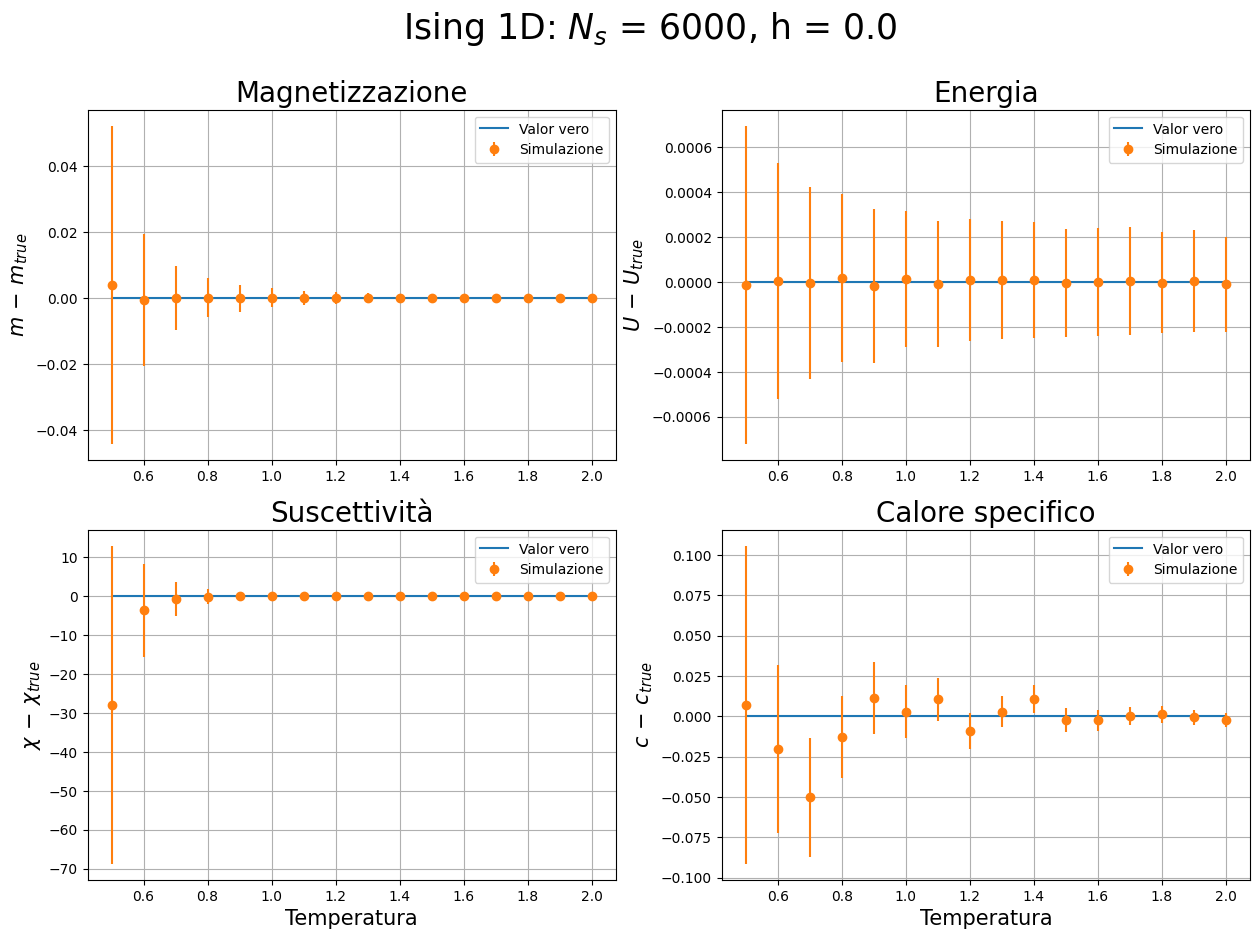

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

T = np.linspace(0.2, 2.0, 200)
ax[0, 0].plot(t_camp, np.zeros(len(t_camp)), label = 'Valor vero')
ax[0, 0].errorbar(t_camp, magn_6000_0 - m_camp_0, yerr = magn_6000_0_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[0, 0].set_ylabel(r'$m\,-\,m_{true}$', fontsize = 15)
ax[0, 0].set_title(r'Magnetizzazione', fontsize = 20)
ax[0, 0].legend(loc = 'best')
ax[0, 0].grid(True)

ax[0, 1].plot(t_camp, np.zeros(len(t_camp)), label = 'Valor vero')
ax[0, 1].errorbar(t_camp, ene_6000_0 - ene_camp_0, yerr = ene_6000_0_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[0, 1].set_ylabel(r'$U\,-\,U_{true}$', fontsize = 15)
ax[0, 1].set_title(r'Energia', fontsize = 20)
ax[0, 1].legend(loc = 'best')
ax[0, 1].grid(True)

T = np.linspace(0.4, 2.0, 200)
ax[1, 0].plot(t_camp, np.zeros(len(t_camp)), label = 'Valor vero')
ax[1, 0].errorbar(t_camp, chi_6000_0 - chi_camp_0, yerr = chi_6000_0_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[1, 0].set_xlabel('Temperatura', fontsize = 15)
ax[1, 0].set_ylabel(r'$\chi\,-\,\chi_{true}$', fontsize = 15)
ax[1, 0].set_title(r'Suscettività', fontsize = 20)
ax[1, 0].legend(loc = 'best')
ax[1, 0].grid(True)

T = np.linspace(0.2, 2.0, 200)
ax[1, 1].plot(t_camp, np.zeros(len(t_camp)), label = 'Valor vero')
ax[1, 1].errorbar(t_camp, cp_6000_0 - cv_camp_0, yerr = cp_6000_0_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[1, 1].set_xlabel('Temperatura', fontsize = 15)
ax[1, 1].set_ylabel(r'$c\,-\,c_{true}$', fontsize = 15)
ax[1, 1].set_title(r'Calore specifico', fontsize = 20)
ax[1, 1].legend(loc = 'best')
ax[1, 1].grid(True)

fig.suptitle(r'Ising 1D: $N_s$ = 6000, h = 0.0', fontsize = 25)
plt.show()

<center>

<span style="color:blue; font-size:50px;"> N = 10000 </span>

</center>

In [46]:
size = '10000'

ene_10000_0 = np.zeros(len(temp))
ene_10000_0_err = np.zeros(len(temp))

magn_10000_0 = np.zeros(len(temp))
magn_10000_0_err = np.zeros(len(temp))

cp_10000_0 = np.zeros(len(temp))
cp_10000_0_err = np.zeros(len(temp))

chi_10000_0 = np.zeros(len(temp))
chi_10000_0_err = np.zeros(len(temp))


# Ciclo sulle varie temperature
for i in range(0, len(temp)):

    # Carico gli osservabili da file
    name = 'magn0.0/obs/obs_size' + size + '_t' + temp[i] + '.out'
    obs = np.loadtxt(name)


    # Valuto i valori medi
    ene_10000_0[i] = np.mean(obs[:, 1])
    ene_10000_0_err[i] = np.std(obs[:, 1], ddof=1)

    magn_10000_0[i] = np.mean(obs[:, 2])
    magn_10000_0_err[i] = np.std(obs[:, 2], ddof=1)
    
    cp_10000_0[i] = np.mean(obs[:, 3])
    cp_10000_0_err[i] = np.std(obs[:, 3], ddof=1)
    
    chi_10000_0[i] = np.mean(obs[:, 4])
    chi_10000_0_err[i] = np.std(obs[:, 4], ddof=1)

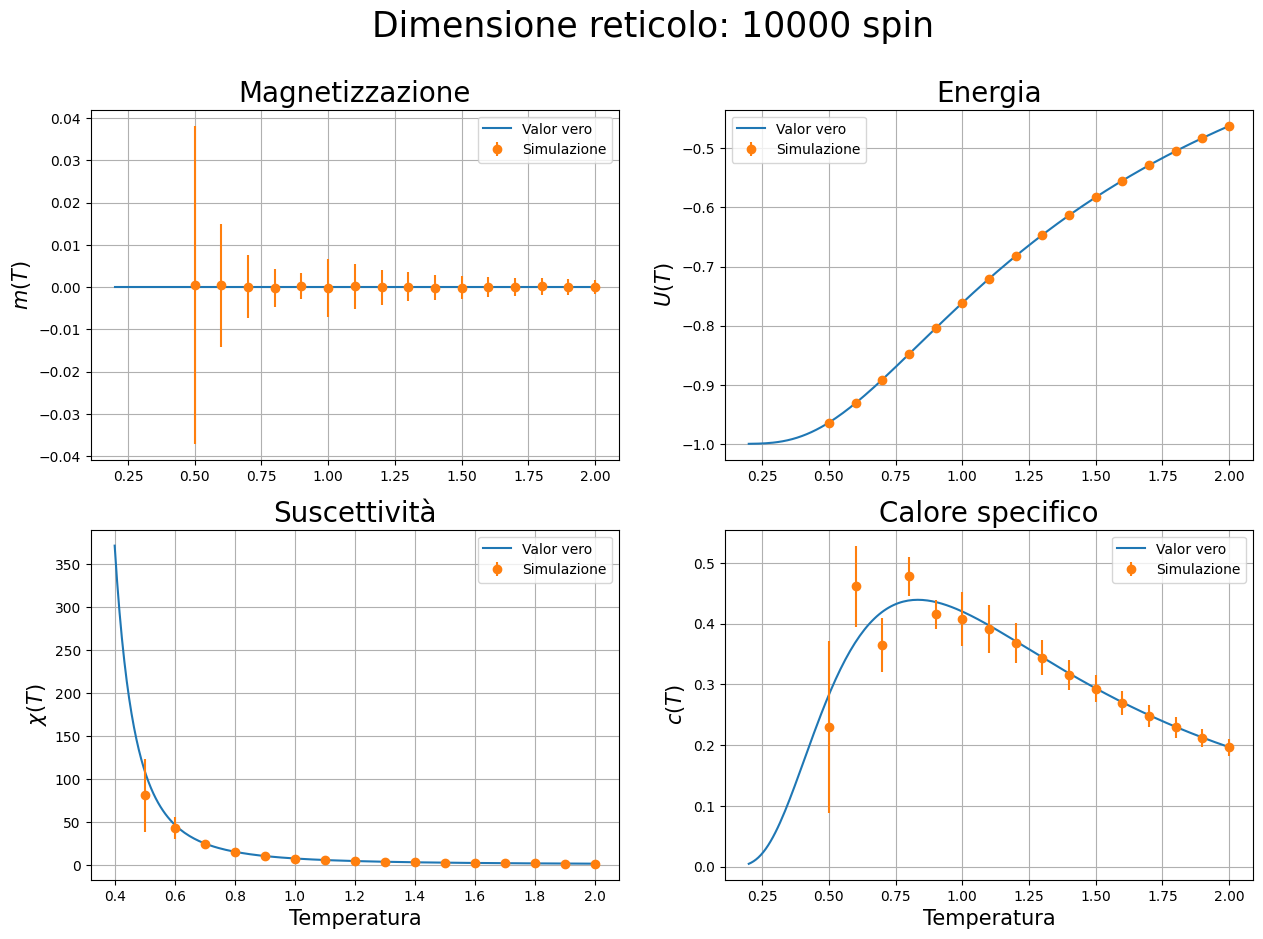

In [47]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

T = np.linspace(0.2, 2.0, 200)
ax[0, 0].plot(T, m_0, label = 'Valor vero')
ax[0, 0].errorbar(t_camp, magn_10000_0, yerr = magn_10000_0_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[0, 0].set_ylabel(r'$m\left(T\right)$', fontsize = 15)
ax[0, 0].set_title(r'Magnetizzazione', fontsize = 20)
ax[0, 0].legend(loc = 'best')
ax[0, 0].grid(True)

ax[0, 1].plot(T, ene_0, label = 'Valor vero')
ax[0, 1].errorbar(t_camp, ene_10000_0, yerr = ene_10000_0_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[0, 1].set_ylabel(r'$U\left(T\right)$', fontsize = 15)
ax[0, 1].set_title(r'Energia', fontsize = 20)
ax[0, 1].legend(loc = 'best')
ax[0, 1].grid(True)

T = np.linspace(0.4, 2.0, 200)
ax[1, 0].plot(T, chi_0, label = 'Valor vero')
ax[1, 0].errorbar(t_camp, chi_10000_0, yerr = chi_10000_0_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[1, 0].set_xlabel('Temperatura', fontsize = 15)
ax[1, 0].set_ylabel(r'$\chi\left(T\right)$', fontsize = 15)
ax[1, 0].set_title(r'Suscettività', fontsize = 20)
ax[1, 0].legend(loc = 'best')
ax[1, 0].grid(True)

T = np.linspace(0.2, 2.0, 200)
ax[1, 1].plot(T, cv_0, label = 'Valor vero')
ax[1, 1].errorbar(t_camp, cp_10000_0, yerr = cp_10000_0_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[1, 1].set_xlabel('Temperatura', fontsize = 15)
ax[1, 1].set_ylabel(r'$c\left(T\right)$', fontsize = 15)
ax[1, 1].set_title(r'Calore specifico', fontsize = 20)
ax[1, 1].legend(loc = 'best')
ax[1, 1].grid(True)

fig.suptitle(r'Dimensione reticolo: 10000 spin', fontsize = 25)
plt.show()

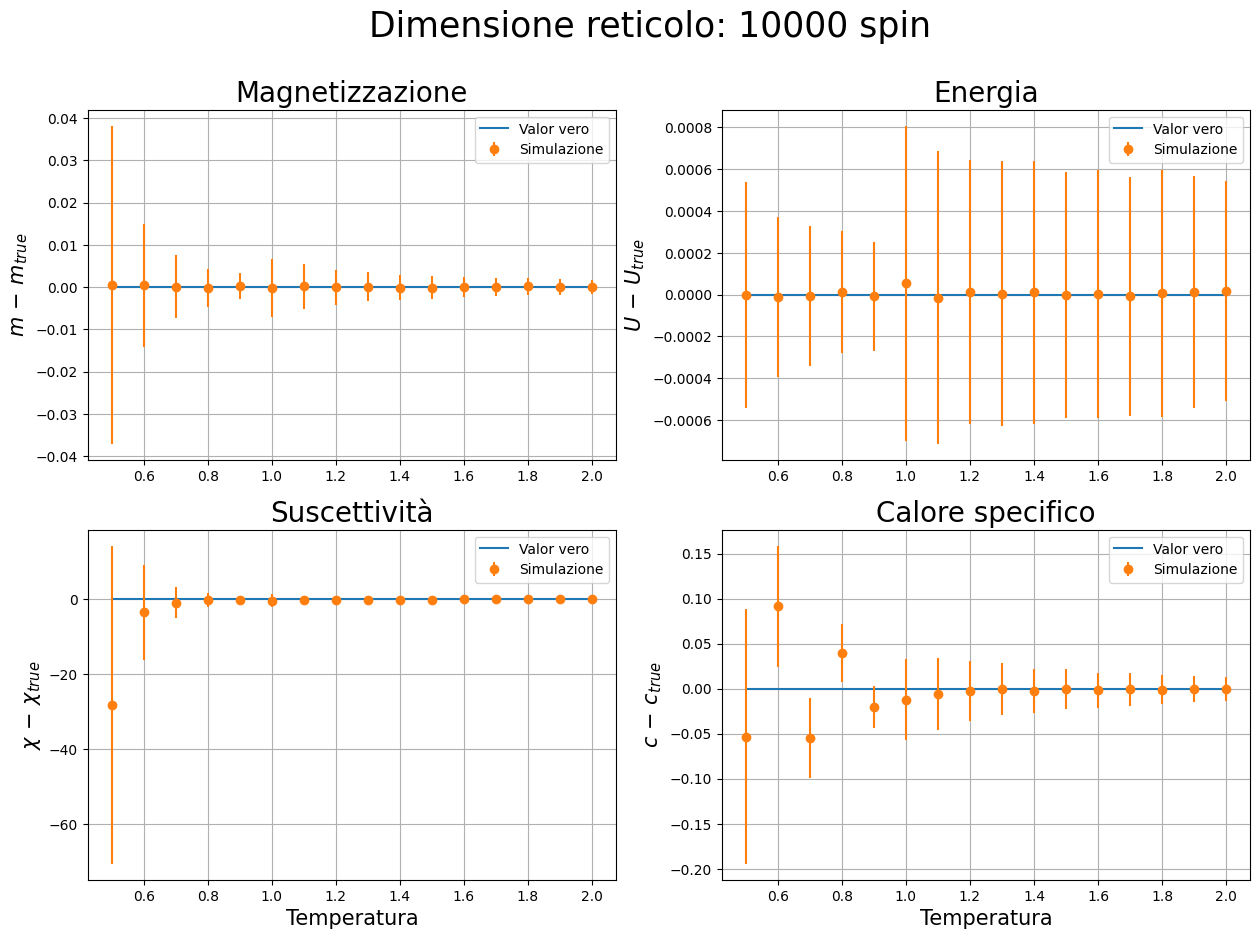

In [48]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0, 0].plot(t_camp, np.zeros(len(t_camp)), label = 'Valor vero')
ax[0, 0].errorbar(t_camp, magn_10000_0 - m_camp_0, yerr = magn_10000_0_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[0, 0].set_ylabel(r'$m\,-\,m_{true}$', fontsize = 15)
ax[0, 0].set_title(r'Magnetizzazione', fontsize = 20)
ax[0, 0].legend(loc = 'best')
ax[0, 0].grid(True)

ax[0, 1].plot(t_camp, np.zeros(len(t_camp)), label = 'Valor vero')
ax[0, 1].errorbar(t_camp, ene_10000_0 - ene_camp_0, yerr = ene_10000_0_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[0, 1].set_ylabel(r'$U\,-\,U_{true}$', fontsize = 15)
ax[0, 1].set_title(r'Energia', fontsize = 20)
ax[0, 1].legend(loc = 'best')
ax[0, 1].grid(True)

ax[1, 0].plot(t_camp, np.zeros(len(t_camp)), label = 'Valor vero')
ax[1, 0].errorbar(t_camp, chi_10000_0 - chi_camp_0, yerr = chi_10000_0_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[1, 0].set_xlabel('Temperatura', fontsize = 15)
ax[1, 0].set_ylabel(r'$\chi\,-\,\chi_{true}$', fontsize = 15)
ax[1, 0].set_title(r'Suscettività', fontsize = 20)
ax[1, 0].legend(loc = 'best')
ax[1, 0].grid(True)

ax[1, 1].plot(t_camp, np.zeros(len(t_camp)), label = 'Valor vero')
ax[1, 1].errorbar(t_camp, cp_10000_0 - cv_camp_0, yerr = cp_10000_0_err, linestyle = 'None', fmt = 'o', label = 'Simulazione')
ax[1, 1].set_xlabel('Temperatura', fontsize = 15)
ax[1, 1].set_ylabel(r'$c\,-\,c_{true}$', fontsize = 15)
ax[1, 1].set_title(r'Calore specifico', fontsize = 20)
ax[1, 1].legend(loc = 'best')
ax[1, 1].grid(True)

fig.suptitle(r'Dimensione reticolo: 10000 spin', fontsize = 25)
plt.show()